## **Mini-Proyecto 2: Modelos de Variable Latente para el Reconocimiento de Emociones**
### *Tratamiento de señales III*

David Esteban Londoño Patiño

Facultad de Ingeniería, Universidad de Antioquia

2023-2

### **Descripción**

La emoción es un proceso psicofisiológico desencadenado por la percepción consciente y/o inconsciente de un objeto o situación y, a menudo, se asocia con el estado de ánimo, el temperamento, la personalidad, la disposición y la motivación. Las emociones juegan un papel importante en la comunicación humana y pueden expresarse verbalmente a través del vocabulario emocional o mediante la expresión de señales no verbales como la entonación de la voz, las expresiones faciales y los gestos. La mayoría de los sistemas contemporáneos de interacción humano-computadora (HCI) son deficientes en la interpretación de esta información y carecen de inteligencia emocional. En otras palabras, no pueden identificar los estados emocionales humanos y utilizar esta información para decidir las acciones adecuadas que ejecutar. El objetivo de la computación afectiva es llenar este vacío detectando señales emocionales que ocurren durante la interacción humano-computadora y sintetizando respuestas emocionales.

La evaluación de las emociones a menudo se lleva a cabo mediante el análisis de las expresiones emocionales y/o señales fisiológicas de los usuarios. Las expresiones emocionales se refieren a cualquier comportamiento verbal y no verbal observable que comunica emoción. Hasta ahora, la mayoría de los estudios sobre evaluación de emociones se han centrado en el análisis de las expresiones faciales y el habla para determinar el estado emocional de una persona. También se sabe que las señales fisiológicas incluyen información emocional que se puede utilizar para evaluar las emociones, pero han recibido menos atención. Estas comprenden las señales que se originan en el sistema nervioso central (SNC) y el sistema nervioso periférico (SNP).

### **Actividad de aprendizaje**

1. Para el sistema de Análisis Multivariado de Señales fisiológicas obtenido en el Primer Mini-Proyecto, se debe construir un módulo de variable latente utilizando el algoritmo de PCA. La idea es proyectar la matriz característica obtenida $X \in \mathbb{R}^{N \times D}$, a un espacio latente de menor dimensión $q << D$, de tal forma que los nuevos datos en este espacio sean $Z \in \mathbb{R}^{N \times q}$. Selecciones diferentes configuraciones del número de componentes $q$ y evalúe el mejor desempeño arrojado por el modelo midiendo, el *accuracy* y la matriz de confusión. Para ellos:

a) Realice la visualización de las componentes en el espacio latente para diferentes configuraciones de $q$

b) ¿Qué puede observar al respecto?

c) Entrene un modelo lineal de clasificaci ́on Mínimos Cuadrados, Bayesiano y Regresión Logística, con el fin de evaluar el desempeño en el reconocimiento de los tipos de movimiento tanto en el espacio de entrada (sin utilizar PCA),cómo en el espacio latente.

2. Dado que PCA es un modelo lineal de variable latente en el cual las características son mapeadas de la forma
$(z = Wx)$, en muchas aplicaciones reales las relaciones entre los datos son no lineales. Es por esto que modelos como
la reducción de la dimensionalidad a través del uso de funciones de mapeo (kernel) no lineales puede ayudarnos en la
tarea. Aquí el mapeo se realiza utilizando $(z = \Phi x )$, donde $( \Phi )$ es la matriz de mapeo no lineal conocida como función
de kernel. Estas funciones de kernel pueden tener diferentes naturalezas como lineales, exponenciales, polinomiales,
entre otras. Su objetivo aquí es realizar el procedimiento de mapeo del dataset de movimientos utilizando Kernel
PCA (Kernel Principal Component Analysis).

a) Cómo lucen las características proyectados en ambos espacios latentes PCA y KPCA?. Implemente su visualización.

b) Utilice este nuevo subconjunto de datos con un clasificador basado en regresión Logística para el reconocimiento. ¿Qué puede evidenciar en el desempeño del nuevo modelo de reconocimiento (con KPCA) para esta tarea?


### **Desarrollo de la actividad**



La Base de Datos DEAP representa un recurso multimodal diseñado para el análisis de los estados emocionales en seres humanos. En este proyecto, se capturaron datos de 32 participantes, incluyendo registros de electroencefalograma (EEG) y señales fisiológicas periféricas, mientras cada uno de ellos visualizaba 40 extractos de videos musicales con una duración de un minuto cada uno. Los participantes evaluaron cada video en términos de excitación (arousal), valencia, preferencia, dominio y familiaridad. Además, en el caso de 22 de los 32 participantes, se grabó un video frontal.

**Importar Librerías necesarias para el proyecto**

In [91]:
# Importar librerías

import scipy.io as sc
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from ipywidgets import interact
%matplotlib inline

**Descarga de los sets de datos**

In [92]:
#https://drive.google.com/file/d/1A7h9ir9gatSn4WNWr2JQUPCKGOai-ZKb/view?usp=sharing
!gdown '1A7h9ir9gatSn4WNWr2JQUPCKGOai-ZKb'

#https://drive.google.com/file/d/1-1_CXdtbZDMxo4x7lDM4w3Ecqu-6PAa8/view?usp=sharing
!gdown '1-1_CXdtbZDMxo4x7lDM4w3Ecqu-6PAa8'

#https://drive.google.com/file/d/12ffKvlfh4JQqXDxVISiPHoGM88nEokcS/view?usp=sharing
!gdown '12ffKvlfh4JQqXDxVISiPHoGM88nEokcS'

#https://drive.google.com/file/d/1jFQPbGLw3N9HwxLaJt8EEC5EuAR66TVJ/view?usp=sharing
!gdown '1jFQPbGLw3N9HwxLaJt8EEC5EuAR66TVJ'

Downloading...
From: https://drive.google.com/uc?id=1A7h9ir9gatSn4WNWr2JQUPCKGOai-ZKb
To: /content/s14.mat
100% 80.6M/80.6M [00:00<00:00, 90.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1_CXdtbZDMxo4x7lDM4w3Ecqu-6PAa8
To: /content/s17.mat
100% 80.7M/80.7M [00:12<00:00, 6.55MB/s]
Downloading...
From: https://drive.google.com/uc?id=12ffKvlfh4JQqXDxVISiPHoGM88nEokcS
To: /content/s16.mat
100% 80.8M/80.8M [00:00<00:00, 86.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jFQPbGLw3N9HwxLaJt8EEC5EuAR66TVJ
To: /content/s15.mat
100% 80.7M/80.7M [00:01<00:00, 79.3MB/s]


**Carga de datos desde archivos .mat y almacenarlos en la variable 'datosPX'**

In [93]:
datosP1 = sc.loadmat('s14.mat')
datosP2 = sc.loadmat('s15.mat')
datosP3 = sc.loadmat('s16.mat')
datosP4 = sc.loadmat('s17.mat')

**Obtener los datos de señales y etiquetas de cada señal de datos datosPX**

In [94]:
signals1   = datosP1['data']
etiquetas1 = datosP1['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

signals2   = datosP2['data']
etiquetas2 = datosP2['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

signals3   = datosP3['data']
etiquetas3 = datosP3['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

signals4   = datosP4['data']
etiquetas4 = datosP4['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

**Canales de tipos de señales**

In [95]:
fs = 128 # En la descripción de los datos se informa que la frecuencia de muestreo es de 128 Hz

# Canales de tipos de señales
canal_hEOG = 33
canal_vEOG = 34
canal_zEMG = 35
canal_tEMG = 36
canal_GSR = 37
canal_respiracion = 38
canal_plethysmograph = 39
canal_temperatura = 40

Cada Conjunto de características procesado será un vector de ${\bf{x}}\in\mathbb{R}^{D\times 1}$

Se construirá una matriz de características ${\bf{X}}\in\mathbb{R}^{N\times D}$ donde ${\bf{X}} = \{{\bf{x}}_n\}_{n=1}^{N}$

**Extraer la columna Valence y Arousal de etiquetasX**

In [96]:
Valence1 = etiquetas1[:,0]
Arousal1 = etiquetas1[:,1]

Valence2 = etiquetas2[:,0]
Arousal2 = etiquetas2[:,1]

Valence3 = etiquetas3[:,0]
Arousal3 = etiquetas3[:,1]

Valence4 = etiquetas4[:,0]
Arousal4 = etiquetas4[:,1]

### Extracción de características


Se toma una matriz de entrada X, que será nuestro set de datos por cada sujeto, que contiene valores de Valence y Arousal de emociones. Luego, se clasifica estas emociones en categorías específicas según sus valores de Valence y Arousal, asignando etiquetas a cada emoción. Las categorías incluyen emociones como Negativa, Neutral, Positiva, Estrés, Calma, Tristeza, Satisfecho, Tranquilidad y Sorpresa.

In [249]:
def caracterizar_etiquetas(X):
    # Extraer las columnas Valence y Arousal de la matriz X
    Valence = X[:, 0]
    Arousal = X[:, 1]

    # Definir condiciones lógicas para diferentes categorías emocionales
    negA = np.logical_and(Arousal >= 1, Arousal <= 3)
    negV = np.logical_and(Valence >= 1, Valence <= 3)

    neutralA = np.logical_and(Arousal > 3, Arousal < 7)
    neutralV = np.logical_and(Valence > 3, Valence < 7)

    posA = Arousal >= 7
    posV = Valence >= 7

    # Crear una matriz de etiquetas vacía
    Etiquetas = np.empty((40, 1), dtype="U25")

    # Asignar etiquetas a las diferentes categorías emocionales
    Etiquetas[np.logical_and(neutralA, neutralV)] = "Neutral"   # Emocion Neutral neutralA y neutralV
    Etiquetas[np.logical_and(negA, negV)] = "Calmado"           # Emocion Negativa negA y negV
    Etiquetas[np.logical_and(posA, posV)] = "Excitado"          # Emocion Positiva posA y posV
    Etiquetas[np.logical_and(posA, negV)] = "Excitado"          # Emocion Stress posA y negV
    Etiquetas[np.logical_and(negA, posV)] = "Calmado"           # Emocion Calm negA y posV
    Etiquetas[np.logical_and(neutralA, negV)] = "Neutral"       # Emocion Tristeza neutralA y negV
    Etiquetas[np.logical_and(neutralA, posV)] = "Neutral"       # Emocion Satisfecho (Pleasant) neutralA y posV
    Etiquetas[np.logical_and(negA, neutralV)] = "Calmado"       # Emocion Tranquilidad negA y neutralV
    Etiquetas[np.logical_and(posA, neutralV)] = "Excitado"      # Emocion Sorpresa posA y neutralV

    return Etiquetas

**Calcular las emociones para etiquetasX usando la función caracterizar_etiquetas**

In [250]:
# Calcular las emociones para etiquetasX usando la función caracterizar_etiquetas
emociones1 = caracterizar_etiquetas(etiquetas1)
emociones2 = caracterizar_etiquetas(etiquetas2)
emociones3 = caracterizar_etiquetas(etiquetas3)
emociones4 = caracterizar_etiquetas(etiquetas4)

# Concatenar las emociones de los cuatro conjuntos de datos en una sola matriz
emociones = np.concatenate((emociones1, emociones2, emociones3, emociones4))

# Obtener las dimensiones de la matriz de emociones
emociones.shape

(160, 1)

**Contar la frecuencia de cada emoción en la matriz de emociones**

In [251]:
emociones.shape = (160)

# Crear un diccionario para contar la frecuencia de cada emoción
frecuencia_emociones = {}

# Contar la frecuencia de cada emoción en la matriz de emociones
for emocion in emociones:
    if emocion in frecuencia_emociones:
        frecuencia_emociones[emocion] = frecuencia_emociones[emocion] + 1
    else:
        frecuencia_emociones[emocion] = 1

# Imprimir el diccionario de frecuencia de emociones
print(frecuencia_emociones)

{'Excitado': 20, 'Neutral': 121, 'Calmado': 19}


### **Extracción de características GSR**

In [253]:
def extraer_caracteristicas_GSR(X, canal):
  # Inicializar una lista para almacenar las características
  L = []

  # Obtener el canal de GSR especificado
  GSR = X[canal-1]

  # Media (mean) de GSR
  L.append(np.mean(GSR))

  # Promedio de la primera derivada
  diff = np.diff(GSR)
  L.append(np.mean(diff))

  # Promedio de la derivada solo para valores negativos
  aux = []
  for i in diff:
    if i < 0 :
      aux.append(i)
  L.append(np.mean(aux))

  # Proporción de muestras negativas en la derivada vs. todas las muestras
  L.append(len(aux)/len(diff))

  return L

### **Extracción de características Blood**

In [254]:
def extraer_caracteristicas_Blood(X, L, canal):
  # Obtener el canal de Blood especificado
  Blood = X[canal-1]

  # Media (average) de Blood
  L.append(np.mean(Blood))

  # Desviación estándar (STD) de Blood
  L.append(np.std(Blood))

  # Potencia espectral en el rango de frecuencia 0.1 - 0.2 Hz
  b,a = scipy.signal.butter(2,(0.1/(128*0.5),0.2/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Blood)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))

  # Potencia espectral en el rango de frecuencia 0.2 - 0.3 Hz
  b,a = scipy.signal.butter(2,(0.2/(128*0.5),0.3/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Blood)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))

  # Potencia espectral en el rango de frecuencia 0.3 - 0.4 Hz
  b,a = scipy.signal.butter(2,(0.3/(128*0.5),0.4/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Blood)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))

  return L

### **Extracción de características Respiration**

In [255]:
def extraer_caracteristicas_Respiration(X, L, canal):
  # Obtener el canal de Respiración especificado
  Respiration=X[canal-1]

  # Media (average) de Respiración
  L.append(np.mean(Respiration))

  # Media de la derivada (mean derivate) de Respiración
  L.append(np.mean(np.diff(Respiration)))

  # Desviación estándar (STD) de Respiración
  L.append(np.std(Respiration))

  # Ratio de energía en bandas de frecuencia
  b,a = scipy.signal.butter(2,(0.05/(128*0.5),0.25/(128*0.5)),btype="bandpass", analog=False)
  signal_filter_low = scipy.signal.lfilter(b,a,Respiration)
  f, PSD = scipy.signal.welch(signal_filter_low, 128, nperseg=64)
  pot_low=20*np.log(np.sum(PSD))

  b,a = scipy.signal.butter(2,(0.25/(128*0.5),5/(128*0.5)),btype="bandpass", analog=False)
  signal_filter_high = scipy.signal.lfilter(b,a,Respiration)
  f, PSD = scipy.signal.welch(signal_filter_high, 128, nperseg=64)
  pot_high=20*np.log(np.sum(PSD))

  L.append(pot_low-pot_high)

  return L

### **Extracción de características Skin Temperature**

In [103]:
def extraer_caracteristicas_Skin(X, L, canal):
  # Obtener el canal de Skin especificado
  Skin = X[canal-1]

  # Media (average) de Skin
  L.append(np.mean(Skin))

  # Media de la derivada (mean derivate) de Skin
  L.append(np.mean(np.diff(Skin)))

  # Potencia espectral en el rango de frecuencia 0 - 0.1 Hz
  b,a = scipy.signal.butter(4,0.1/(128*0.5),btype="lowpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Skin)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))

  # Potencia espectral en el rango de frecuencia 0.1 - 0.2 Hz
  b,a = scipy.signal.butter(2,(0.1/(128*0.5),0.2/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Skin)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))

  return L

### **Extracción de características EMG_EOG**

In [104]:
def extraer_caracteristicas_EMG_EOG(X, L):
  for canal in range(32,36):

    # Media (Mean) del canal actual
    L.append(np.mean(X[canal]))

    # Varianza (Variance) del canal actual
    L.append(np.var(X[canal]))

    # Energía (Energy) del canal actual
    L.append(np.sum(np.square(X[canal])))

  return L

### **Extracción de características EEG**

In [105]:
def delta(X):
  # Filtrar la señal en el rango de frecuencia 0.5 - 3.5 Hz
  b,a = scipy.signal.butter(2,(0.5/(128*0.5),3.5/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,X)

  # Calcular la densidad espectral de potencia (PSD)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)

  # Sumar la PSD para obtener un valor delta
  return np.sum(PSD)

In [106]:
def theta(X):
  # Filtrar la señal en el rango de frecuencia 4 - 7 Hz (banda theta)
  b,a = scipy.signal.butter(2,(4/(128*0.5),7/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,X)

  # Calcular la densidad espectral de potencia (PSD)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)

  # Sumar la PSD para obtener un valor theta
  return np.sum(PSD)

In [107]:
def alpha(X):
  # Filtrar la señal en el rango de frecuencia 8 - 13 Hz (banda alpha)
  b,a = scipy.signal.butter(2,(8/(128*0.5),13/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,X)

  # Calcular la densidad espectral de potencia (PSD)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)

  # Sumar la PSD para obtener un valor alpha
  return np.sum(PSD)

In [108]:
def beta(X):
  # Filtrar la señal en el rango de frecuencia 15 - 28 Hz (banda beta)
  b,a = scipy.signal.butter(2,(15/(128*0.5),28/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,X)

  # Calcular la densidad espectral de potencia (PSD)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)

  # Sumar la PSD para obtener un valor beta
  return np.sum(PSD)

In [109]:
def gamma(X):
  # Filtrar la señal en el rango de frecuencia 30 - 60 Hz (banda gamma)
  b,a = scipy.signal.butter(2,(30/(128*0.5),60/(128*0.5)),btype="bandpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,X)

  # Calcular la densidad espectral de potencia (PSD)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)

  # Sumar la PSD para obtener un valor gamma
  return np.sum(PSD)

In [110]:
def extraer_caracteristicas_EEG(X,L):
  # Extraer características de los 32 canales EEG
  for canal in range(0,32):
    L.append(delta(X[canal]))
    L.append(theta(X[canal]))
    L.append(alpha(X[canal]))
    L.append(beta(X[canal]))
    L.append(gamma(X[canal]))

  # Eliminar canales específicos (14, 15, 18, 23) de X
  x = np.delete(X,(14,15,18,23),0)

  # Extraer características de los 14 canales EEG restantes
  for canal in range(0,14):
    aux = x[canal]-x[canal+14]
    L.append(delta(aux))
    L.append(theta(aux))
    L.append(alpha(aux))
    L.append(beta(aux))
    L.append(gamma(aux))

  return L

# **Caracterizador DEAP**

In [111]:
def Caracterizador_DEAP(X):
  caracteristicas = extraer_caracteristicas_GSR(X, canal_GSR)
  caracteristicas = extraer_caracteristicas_Blood(X, caracteristicas, canal_plethysmograph)
  caracteristicas = extraer_caracteristicas_Respiration(X, caracteristicas, canal_respiracion)
  caracteristicas = extraer_caracteristicas_Skin(X, caracteristicas, canal_temperatura)
  caracteristicas = extraer_caracteristicas_EMG_EOG(X, caracteristicas)
  caracteristicas = extraer_caracteristicas_EEG(X,caracteristicas)

  caracteristicas = np.array(caracteristicas)

  return caracteristicas

In [256]:
caracteristicas = []                                  # Inicialización de una lista donde irán las características

for video in signals1:                                # Ciclo que recorre cada uno de los vídeos por usuario
  caracteristicas.append(Caracterizador_DEAP(video))  # Agregamos las características de cada vídeo a la lista caracteristicas

for video in signals2:                                # Ciclo que recorre cada uno de los vídeos por usuario
  caracteristicas.append(Caracterizador_DEAP(video))  # Agregamos las características de cada vídeo a la lista caracteristicas

for video in signals3:                                # Ciclo que recorre cada uno de los vídeos por usuario
  caracteristicas.append(Caracterizador_DEAP(video))  # Agregamos las características de cada vídeo a la lista caracteristicas

for video in signals4:                                # Ciclo que recorre cada uno de los vídeos por usuario
  caracteristicas.append(Caracterizador_DEAP(video))  # Agregamos las características de cada vídeo a la lista caracteristicas

La matriz de características tendrá la forma (160, 259), con 160 muestras diferentes (40 por cada uno de los 4 sujetos del set de datos) y a cada una se le extrajo 259 características

In [257]:
features = np.array(caracteristicas)                  # Volvemos la matriz caracteristicas en un tipo array

In [258]:
scaler = StandardScaler()                             # Crear una instancia del escalador StandardScaler
scaler.fit(features)                                  # Ajustar el escalador a las características
features = scaler.transform(features)                 # Transformar las características utilizando el escalador

In [259]:
data = pd.DataFrame(features)                         # Creamos el DataFrame con las caractarísticas normalizadas
data['Labels'] = emociones                            # en la columba "Labels" agregamos las etiquetas de las emociones

In [260]:
data.shape                                            # Obtener la forma de la matriz de datos consolidados

(160, 260)

In [261]:
data                                                  # Imprimir en pantalla el Dataframe

0         1         2         3         4         5         6  \
0   -3.014913 -5.239230 -1.980598  1.400022 -0.918646  1.143106  5.817433   
1   -1.608333 -2.417379 -1.670440  0.201023  0.035701  1.325445  2.316506   
2   -0.468652 -0.099025  0.507492  0.307443 -0.494695 -0.140608  0.040595   
3    0.267802 -0.036829 -0.024582 -0.242394  0.483081  1.725078  1.639448   
4   -0.835906 -1.092877 -0.457090  1.495800  2.285590  0.930672  1.554443   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.529496  0.434118  0.747293 -1.150511  0.195854 -1.000649 -0.797397   
156  0.189059  0.496744  0.460206 -0.916387  0.604783  0.368042 -0.040622   
157  0.935928  1.032202  0.641410 -1.494603  0.613041 -1.098360 -0.825049   
158 -0.621761 -0.581736  0.416602  1.329075 -0.468086  0.442676  0.380068   
159 -0.256623 -0.097224  0.703560  0.140718  0.292279 -1.015921 -0.836035   

            7         8         9  ...       250       251       252  \
0    3.094144  1.234671  0.661818  ...  0.011656  0.320628  2.496814   
1    0.837677  0.102427  0.202343  ...  0.496391  0.284334  0.316130   
2   -0.221596 -0.140321 -0.219140  ...  0.150076  0.092651  0.687314   
3    0.476965  0.074906  0.441885  ...  0.356673  0.579158  1.092149   
4    3.718520  0.282797  0.101783  ...  5.271019  3.967720  0.922128   
..        ...       ...       ...  ...       ...       ...       ...   
155 -0.415094 -0.279784  0.226372  ... -0.531319 -0.469988 -0.777294   
156 -0.133332  0.039528 -0.077397  ... -0.424782 -0.449738 -0.798179   
157 -0.592798 -0.253093  0.032746  ... -0.431685 -0.562355 -0.803731   
158 -0.489448 -0.185818  0.758232  ... -0.394973 -0.474057 -0.617866   
159 -0.610925 -0.255608  0.414742  ... -0.418140 -0.419050 -0.668304   

          253       254       255       256       257       258    Labels  
0    2.765625 -0.471639 -0.492489 -0.356538  0.037548  0.076219  Excitado  
1   -0.001692 -0.242231 -0.267863 -0.350072 -0.307057 -0.297331  Excitado  
2    1.135435 -0.457419 -0.453987 -0.464666 -0.225788 -0.106181   Neutral  
3    0.727573 -0.413491 -0.395839 -0.379221 -0.233033 -0.212036   Neutral  
4    0.083474  1.350531  1.421749  0.662367 -0.303955 -0.308500  Excitado  
..        ...       ...       ...       ...       ...       ...       ...  
155 -0.732916 -0.681921 -0.720569 -0.929302 -0.535295 -0.403515   Neutral  
156 -0.783108 -0.588433 -0.615994 -0.825785 -0.526399 -0.404930  Excitado  
157 -0.758792 -0.580137 -0.604779 -0.765813 -0.512353 -0.398561   Neutral  
158 -0.569723 -0.579718 -0.588743 -0.742401 -0.533460 -0.396239  Excitado  
159 -0.659246 -0.599871 -0.620094 -0.807783 -0.533660 -0.402850   Neutral  

[160 rows x 260 columns]

In [262]:
# Guardar el DataFrame en un archivo CSV
data.to_csv('caracteristicas.csv', index=False)

## **PCA**

In [263]:
# Características y las etiquetas emocionales
X = data.iloc[:, :-1]  # Ignorar la última columna de Labels
y = data['Labels']

In [264]:
X

0         1         2         3         4         5         6    \
0   -3.014913 -5.239230 -1.980598  1.400022 -0.918646  1.143106  5.817433   
1   -1.608333 -2.417379 -1.670440  0.201023  0.035701  1.325445  2.316506   
2   -0.468652 -0.099025  0.507492  0.307443 -0.494695 -0.140608  0.040595   
3    0.267802 -0.036829 -0.024582 -0.242394  0.483081  1.725078  1.639448   
4   -0.835906 -1.092877 -0.457090  1.495800  2.285590  0.930672  1.554443   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.529496  0.434118  0.747293 -1.150511  0.195854 -1.000649 -0.797397   
156  0.189059  0.496744  0.460206 -0.916387  0.604783  0.368042 -0.040622   
157  0.935928  1.032202  0.641410 -1.494603  0.613041 -1.098360 -0.825049   
158 -0.621761 -0.581736  0.416602  1.329075 -0.468086  0.442676  0.380068   
159 -0.256623 -0.097224  0.703560  0.140718  0.292279 -1.015921 -0.836035   

          7         8         9    ...       249       250       251  \
0    3.094144  1.234671  0.661818  ...  0.022672  0.011656  0.320628   
1    0.837677  0.102427  0.202343  ...  0.528391  0.496391  0.284334   
2   -0.221596 -0.140321 -0.219140  ...  0.156980  0.150076  0.092651   
3    0.476965  0.074906  0.441885  ...  0.309194  0.356673  0.579158   
4    3.718520  0.282797  0.101783  ...  5.383111  5.271019  3.967720   
..        ...       ...       ...  ...       ...       ...       ...   
155 -0.415094 -0.279784  0.226372  ... -0.522017 -0.531319 -0.469988   
156 -0.133332  0.039528 -0.077397  ... -0.422101 -0.424782 -0.449738   
157 -0.592798 -0.253093  0.032746  ... -0.424390 -0.431685 -0.562355   
158 -0.489448 -0.185818  0.758232  ... -0.402042 -0.394973 -0.474057   
159 -0.610925 -0.255608  0.414742  ... -0.422432 -0.418140 -0.419050   

          252       253       254       255       256       257       258  
0    2.496814  2.765625 -0.471639 -0.492489 -0.356538  0.037548  0.076219  
1    0.316130 -0.001692 -0.242231 -0.267863 -0.350072 -0.307057 -0.297331  
2    0.687314  1.135435 -0.457419 -0.453987 -0.464666 -0.225788 -0.106181  
3    1.092149  0.727573 -0.413491 -0.395839 -0.379221 -0.233033 -0.212036  
4    0.922128  0.083474  1.350531  1.421749  0.662367 -0.303955 -0.308500  
..        ...       ...       ...       ...       ...       ...       ...  
155 -0.777294 -0.732916 -0.681921 -0.720569 -0.929302 -0.535295 -0.403515  
156 -0.798179 -0.783108 -0.588433 -0.615994 -0.825785 -0.526399 -0.404930  
157 -0.803731 -0.758792 -0.580137 -0.604779 -0.765813 -0.512353 -0.398561  
158 -0.617866 -0.569723 -0.579718 -0.588743 -0.742401 -0.533460 -0.396239  
159 -0.668304 -0.659246 -0.599871 -0.620094 -0.807783 -0.533660 -0.402850  

[160 rows x 259 columns]

In [265]:
y

0      Excitado
1      Excitado
2       Neutral
3       Neutral
4      Excitado
         ...   
155     Neutral
156    Excitado
157     Neutral
158    Excitado
159     Neutral
Name: Labels, Length: 160, dtype: object

In [266]:
# Codificación de las etiquetas emocionales en números
codificador_etiqueta = LabelEncoder()
y_codificado = codificador_etiqueta.fit_transform(y)
y_codificado

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2])

In [267]:
# Se normalizan las características
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)
X_normalizado

array([[-3.01491321, -5.23923027, -1.98059764, ..., -0.3565378 ,
         0.03754766,  0.07621868],
       [-1.60833342, -2.41737885, -1.67043971, ..., -0.35007232,
        -0.30705685, -0.29733119],
       [-0.46865171, -0.09902546,  0.50749208, ..., -0.46466587,
        -0.22578798, -0.10618096],
       ...,
       [ 0.93592816,  1.03220191,  0.64140971, ..., -0.76581336,
        -0.51235261, -0.398561  ],
       [-0.62176104, -0.58173598,  0.41660161, ..., -0.74240106,
        -0.53346041, -0.3962392 ],
       [-0.25662344, -0.09722353,  0.70355977, ..., -0.80778317,
        -0.53365968, -0.4028504 ]])

### **Espacio Latente**

Espacio latente con 5 componentes

In [268]:
pca = PCA(n_components=5)

# Transformación de los datos al espacio latente
X_pca = pca.fit_transform(X_normalizado)

In [269]:
pca

PCA(n_components=5)

In [270]:
X_pca.shape

(160, 5)

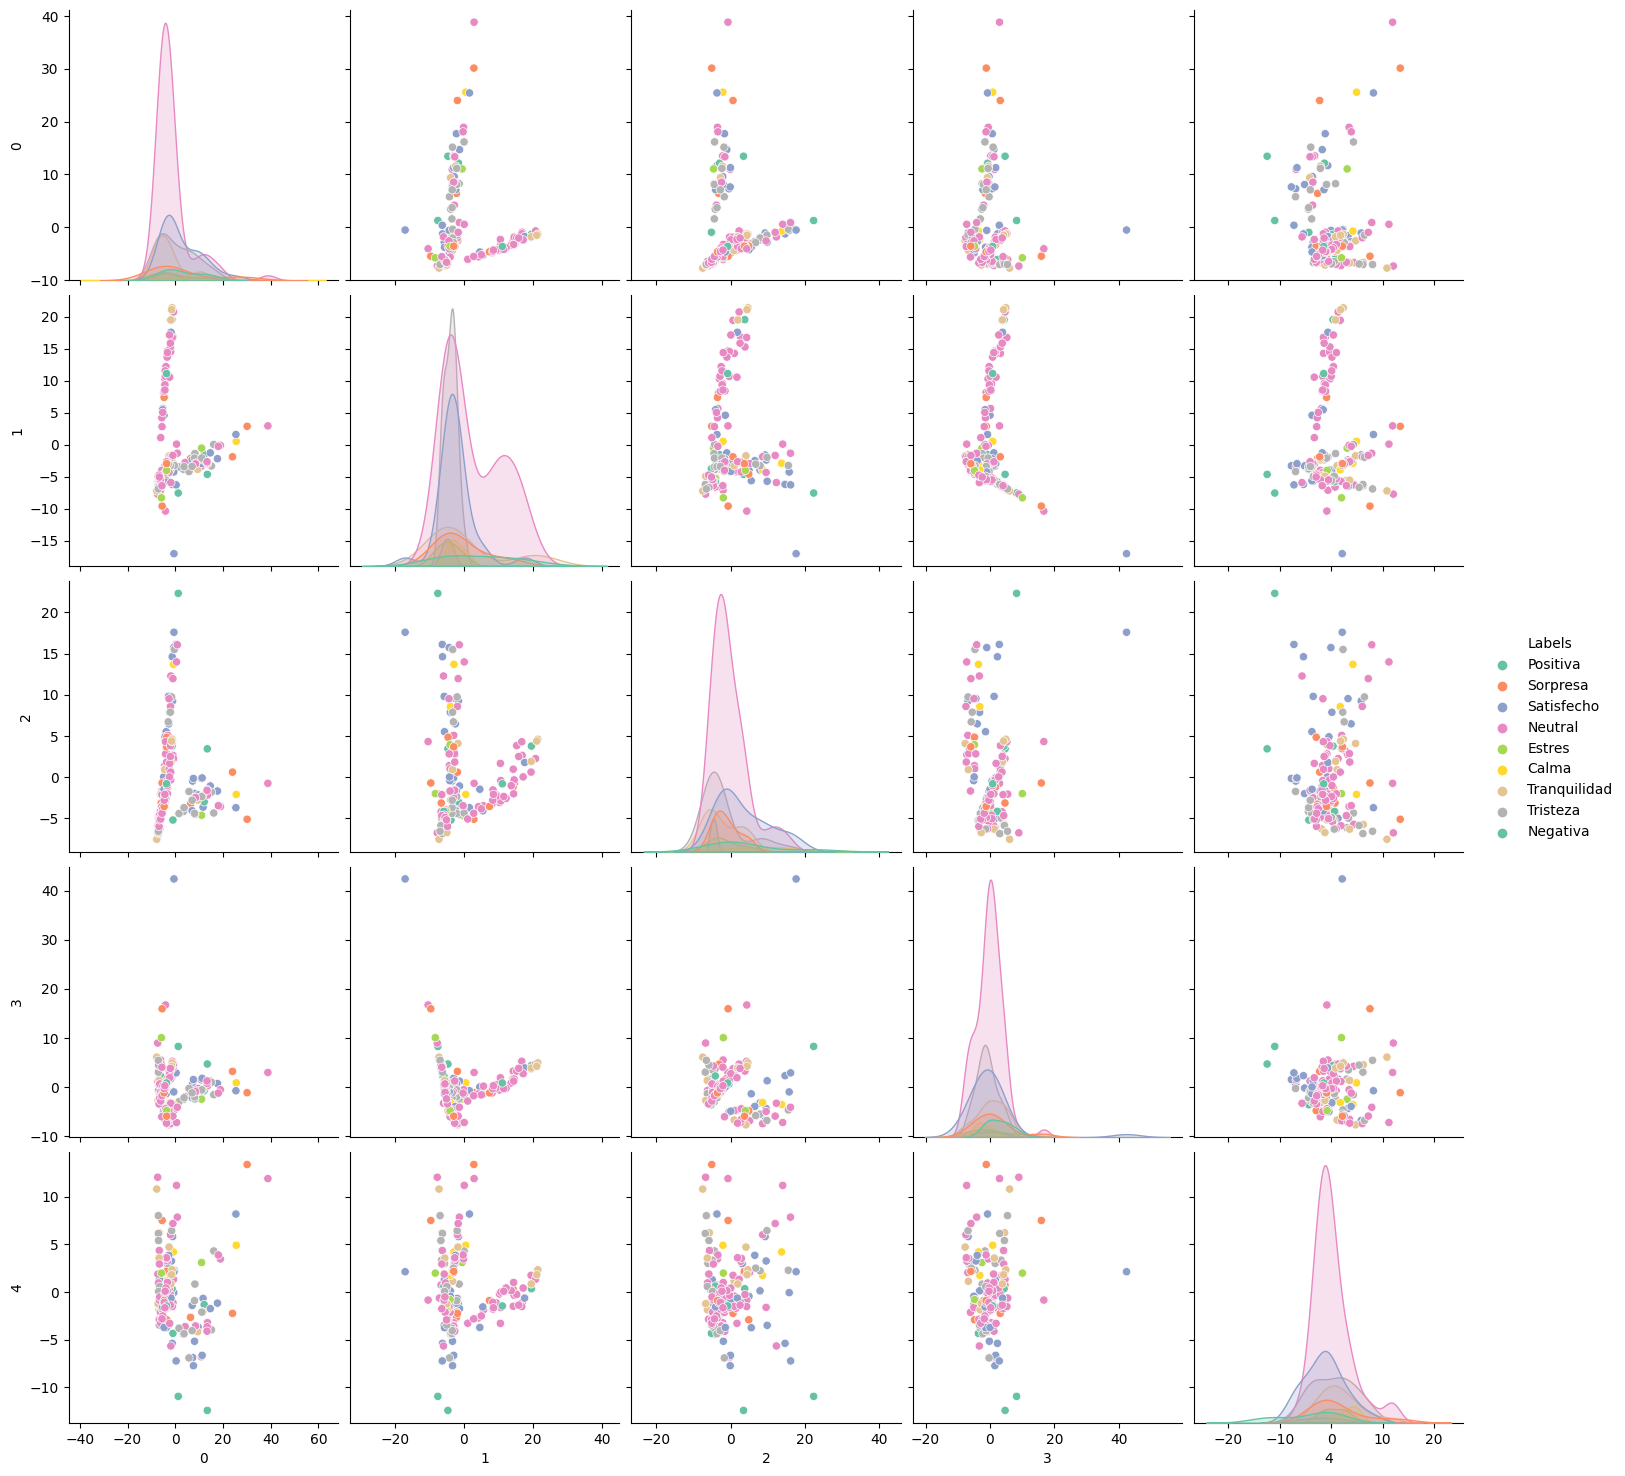

In [127]:
data_pca = pd.DataFrame(data=X_pca)
data_pca['Labels'] = y
sns.pairplot(data_pca, hue="Labels", height=3, palette = sns.color_palette("Set2",9))

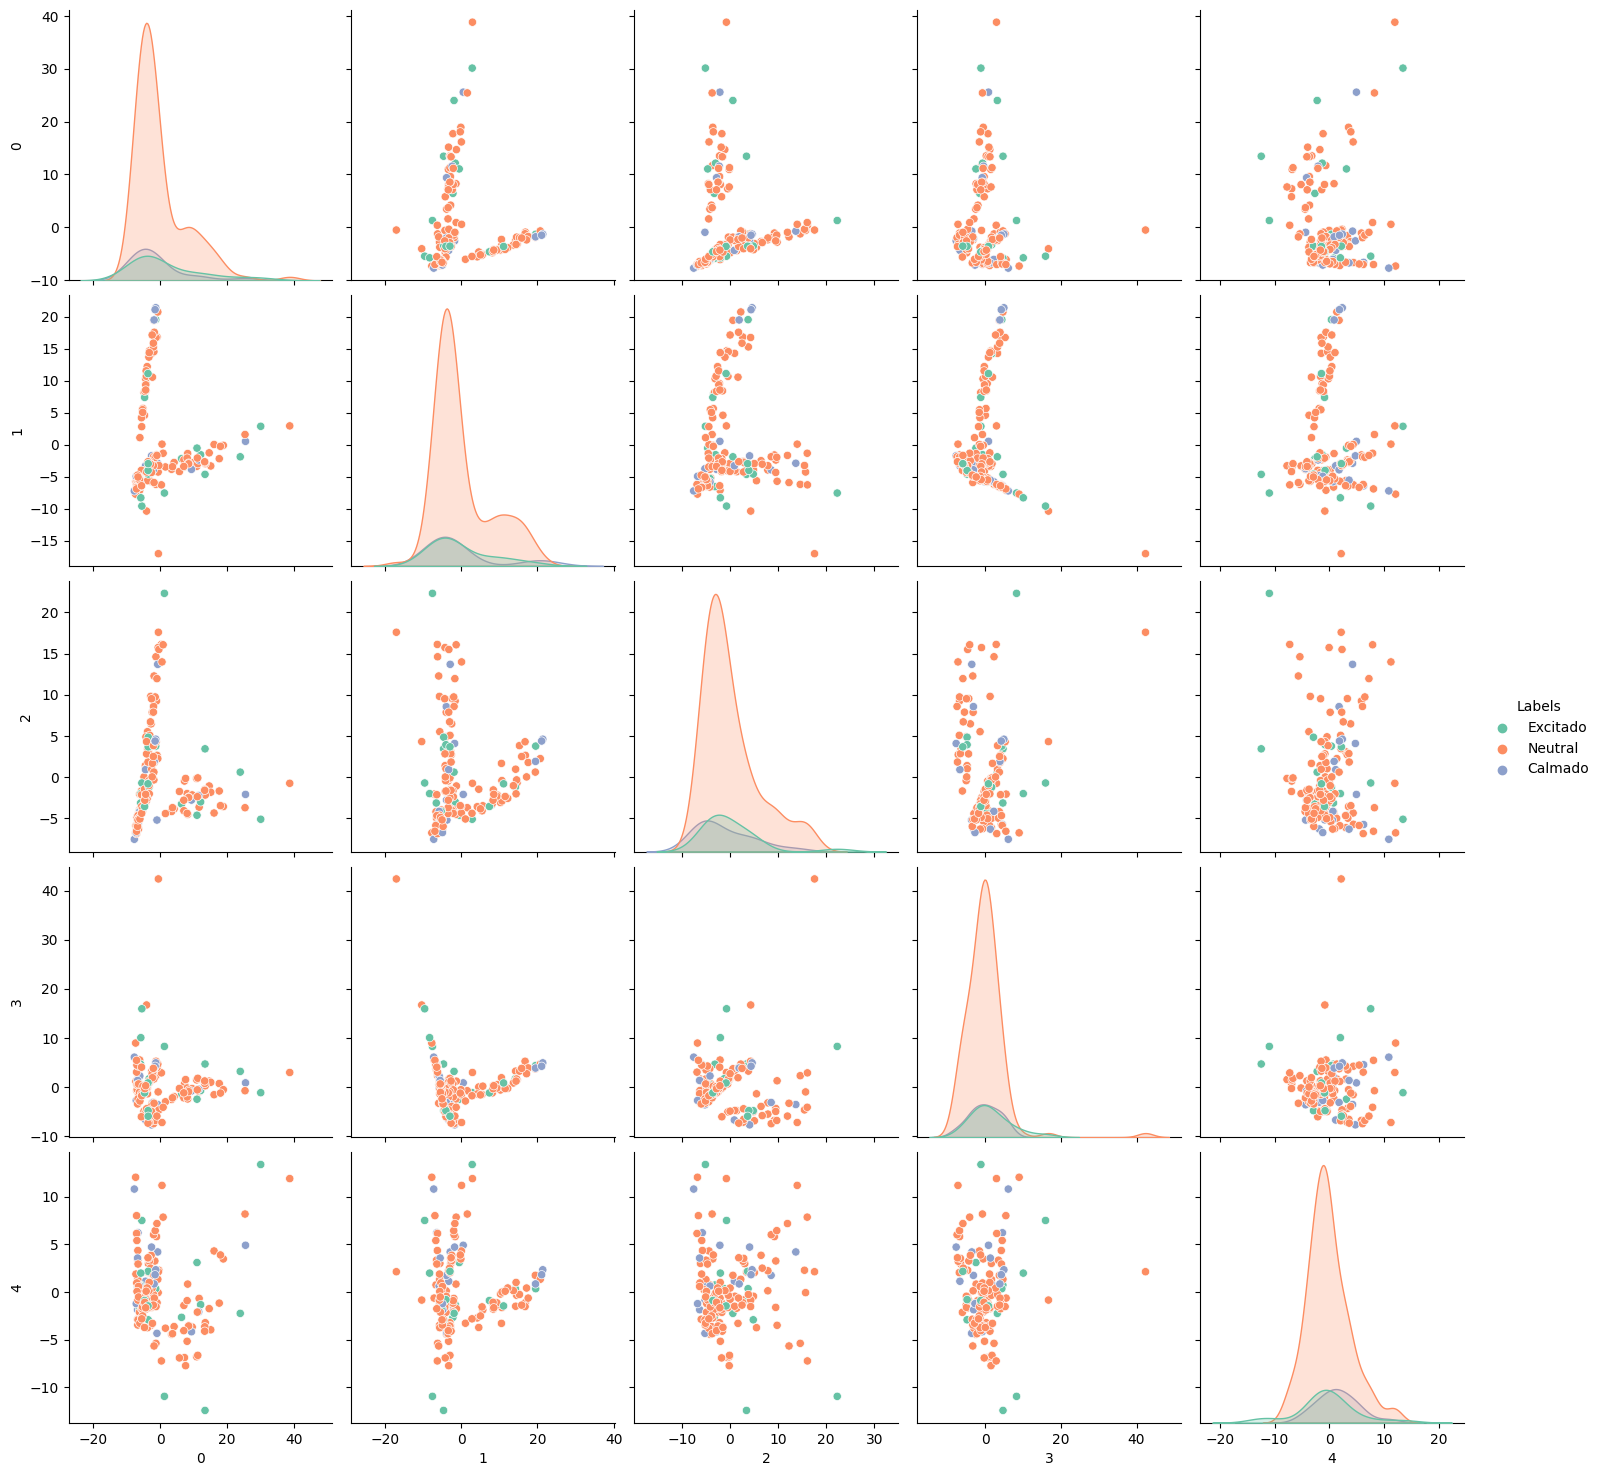

In [272]:
data_pca = pd.DataFrame(data=X_pca)
data_pca['Labels'] = y
sns.pairplot(data_pca, hue="Labels", height=3, palette = sns.color_palette("Set2",3))

In [273]:
data_pca

0          1         2         3          4    Labels
0    13.449238  -4.618266  3.445186  4.686082 -12.437089  Excitado
1     6.413163  -2.164968 -3.245199 -1.474334  -2.656072  Excitado
2     7.283592  -3.455071 -0.462880  0.630236  -6.885572   Neutral
3     8.081633  -3.298867 -1.988834 -0.198482  -5.172398   Neutral
4    30.142983   2.883042 -5.100112 -1.157065  13.398526  Excitado
..         ...        ...       ...       ...        ...       ...
155  -5.528229   2.828485 -4.377940 -1.782893  -2.815800   Neutral
156  -4.652908   7.394443 -3.551104 -1.191744  -0.892476  Excitado
157  -4.602627   8.351254 -2.788917 -0.338409  -1.080058   Neutral
158  -3.643296  11.110970 -0.798578  0.828899  -1.459604  Excitado
159  -4.334607   8.546631 -2.080610  0.261427  -1.650077   Neutral

[160 rows x 6 columns]

### **Modelos de clasificación**

In [138]:
def modelo_minimos_cuadrados(X_train, y_train):
    clasificadorMC = LinearRegression()
    clasificadorMC.fit(X_train, y_train)
    return clasificadorMC

In [139]:
def modelo_bayesiano(X_train, y_train):
    clasificadorBayes = GaussianNB()
    clasificadorBayes.fit(X_train, y_train)
    return clasificadorBayes

In [140]:
def modelo_regresion_logistica(X_train, y_train):
    clasificadorRL = LogisticRegression()
    clasificadorRL.fit(X_train, y_train)
    return clasificadorRL

**Utilidades**

In [319]:
def graficar_espacio_latente(pca, data_pca, y_codificado, data, n_components):
    colors = ['r', 'c', 'g']
    plt.figure(figsize=(15, 5))

    # Espacio latente 2 componentes
    plt.subplot(1, 2, 1)
    for i, emotion in enumerate(data['Labels'].unique()):
      subset = data_pca[y_codificado == i]
      plt.scatter(subset[0], subset[1], label=emotion, color=colors[i])

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.title(f'PCA con q={n_components}')

    # Varianza explicada
    plt.subplot(1, 2, 2)
    plt.plot(np.cumsum(pca.explained_variance_) / np.sum(pca.explained_variance_))
    plt.title('Varianza explicada normalizada')
    plt.grid()

    plt.tight_layout()
    plt.show()

In [279]:
def graficar_matriz_confusion(CMAT, y_codificado):
    ax = ConfusionMatrixDisplay(confusion_matrix=CMAT, display_labels=np.unique(y_codificado))
    ax.plot()
    plt.show()

**Aplicación PCA**

In [280]:
def aplicar_pca(X_normalizado, n_components):
    pca = PCA(n_components=int(n_components))
    X_pca = pca.fit_transform(X_normalizado)
    data_pca = pd.DataFrame(data=X_pca)
    print("PCA - Original shape: ", X_normalizado.shape)
    print("PCA - Transformed shape: ", X_pca.shape)
    return data_pca, pca

In [320]:
def pca(PCA_flag, n_components, model):
  perc = (n_components / 38) * 100
  print(f"Percent variables used: {np.round(perc, 3)}%")

  # Análisis de Componentes Principales (PCA)
  data_pca, pca = aplicar_pca(X_normalizado, n_components)

  # División en conjuntos de entrenamiento y prueba
  if PCA_flag:
      X_train, X_test, y_train, y_test = train_test_split(X_pca, y_codificado, random_state=0, test_size=0.3)
  else:
      X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y_codificado, random_state=0, test_size=0.3)

  # Seleccionar y entrenar el modelo
  # Predicción
  if model == "Mínimos_Cuadrados":
    y_pred = np.round(modelo_minimos_cuadrados(X_train, y_train).predict(X_test))
  elif model == "Bayesiano":
    y_pred = modelo_bayesiano(X_train, y_train).predict(X_test)
  else:
    y_pred = modelo_regresion_logistica(X_train, y_train).predict(X_test)

  # Accuracy y matriz de confusión
  CMAT = confusion_matrix(y_test,y_pred)
  acc = accuracy_score(y_test, y_pred) * 100
  print(f'Accuracy: {acc}%')

  if PCA_flag and n_components >= 2:
      graficar_espacio_latente(pca, data_pca, y_codificado, data, n_components)

  graficar_matriz_confusion(CMAT, y_codificado)

**Evaluación de diferentes modelos**

Percent variables used: 23.684%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 9)
Accuracy: 66.66666666666666%


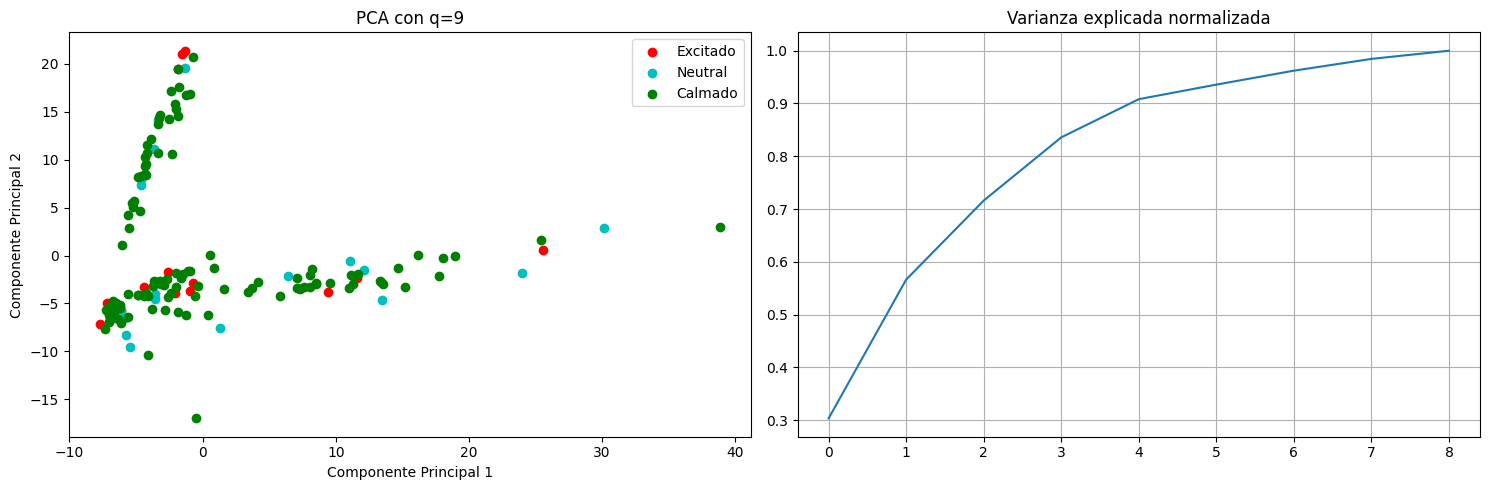

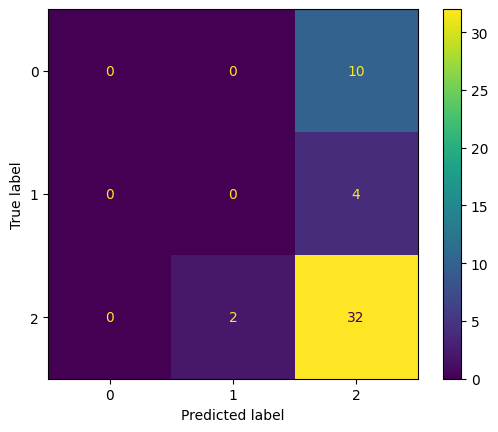

In [321]:
pca(True, 9, "Mínimos_Cuadrados")

Percent variables used: 23.684%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 9)
Accuracy: 60.416666666666664%


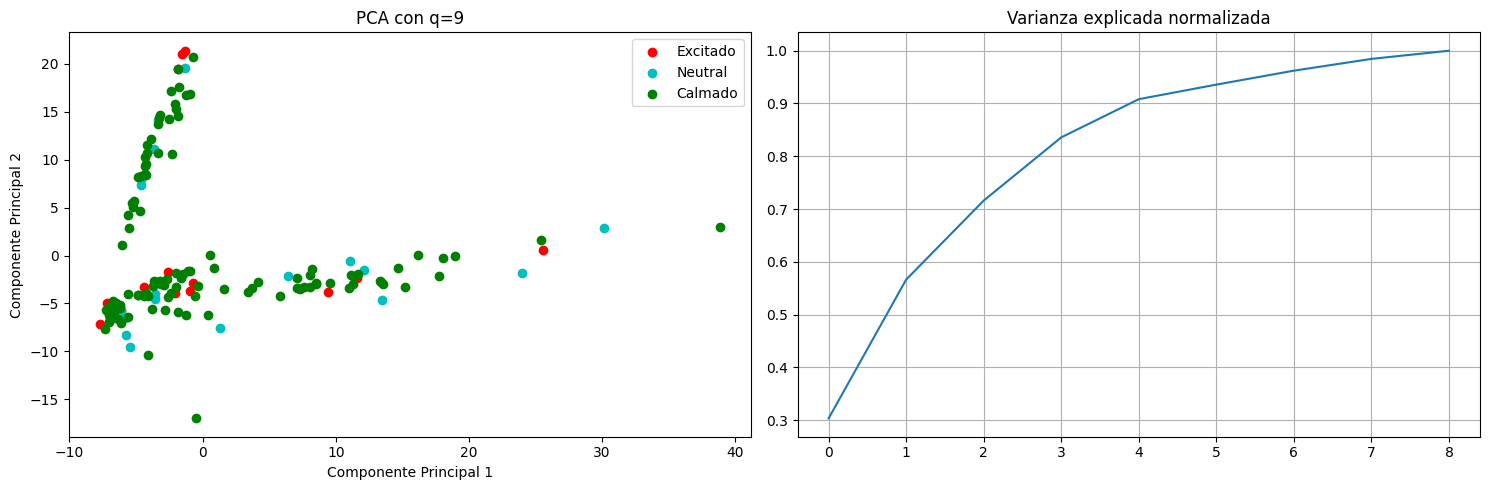

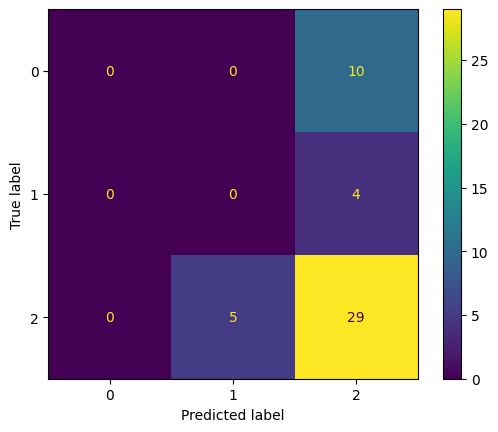

In [323]:
pca(True, 9, "Bayesiano")

Percent variables used: 23.684%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 9)
Accuracy: 43.75%


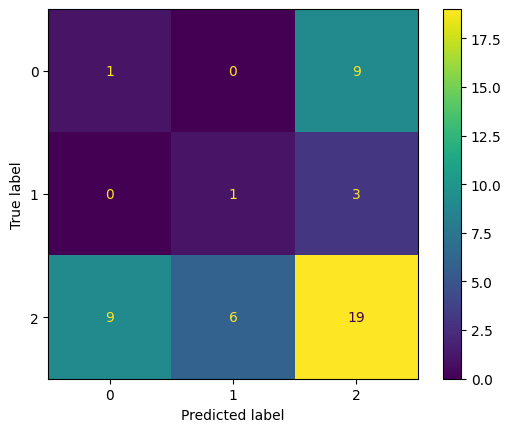

In [324]:
pca(False, 9, "Bayesiano")

Percent variables used: 23.684%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 9)
Accuracy: 70.83333333333334%


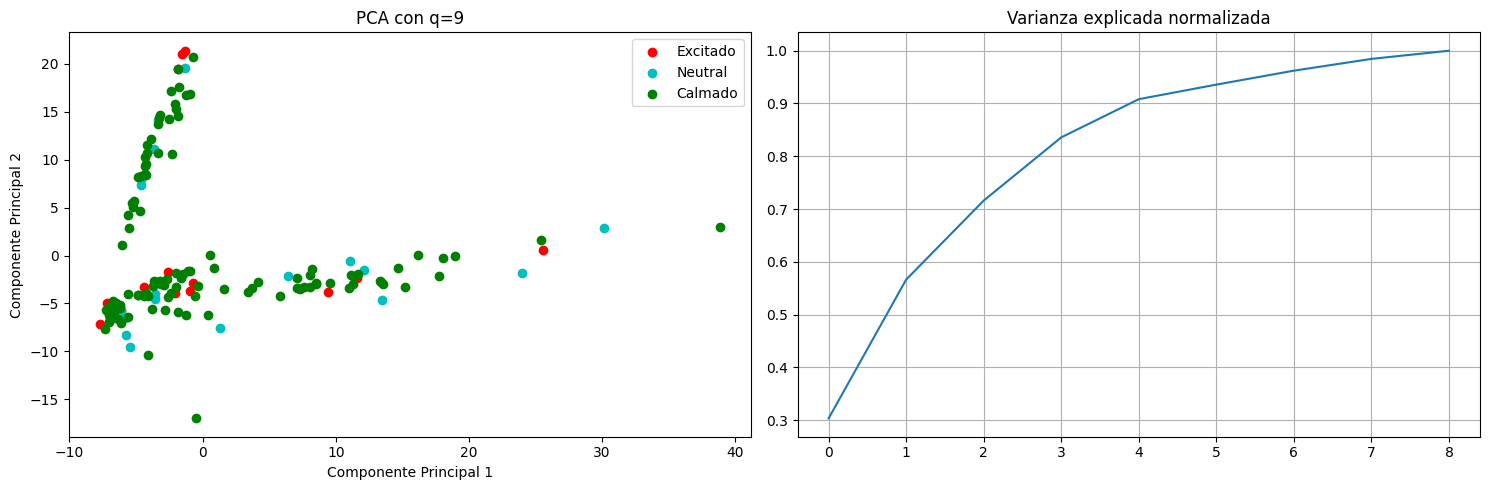

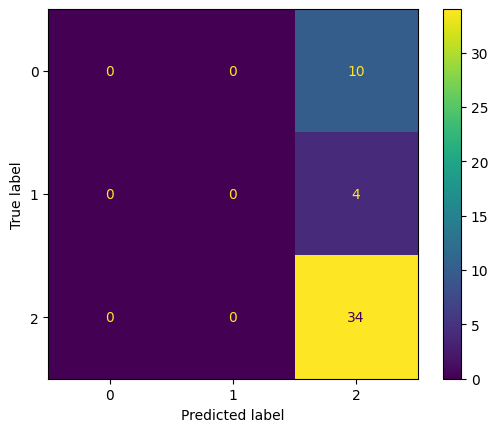

In [325]:
pca(True, 9, "Regresion_Logistica")

Percent variables used: 23.684%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 9)
Accuracy: 62.5%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


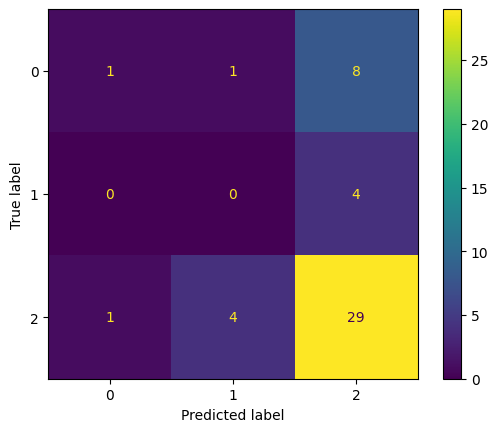

In [326]:
pca(False, 9, "Regresion_Logistica")

## **KPCA**

### **Espacio latente**

Espacio latente con 14 componentes

In [292]:
kpca = KernelPCA(n_components=14, kernel='rbf',gamma=8)

# Transformación de los datos al espacio latente
X_kpca = kpca.fit_transform(X_normalizado)

In [293]:
kpca

KernelPCA(gamma=8, kernel='rbf', n_components=14)

In [294]:
X_kpca.shape

(160, 14)

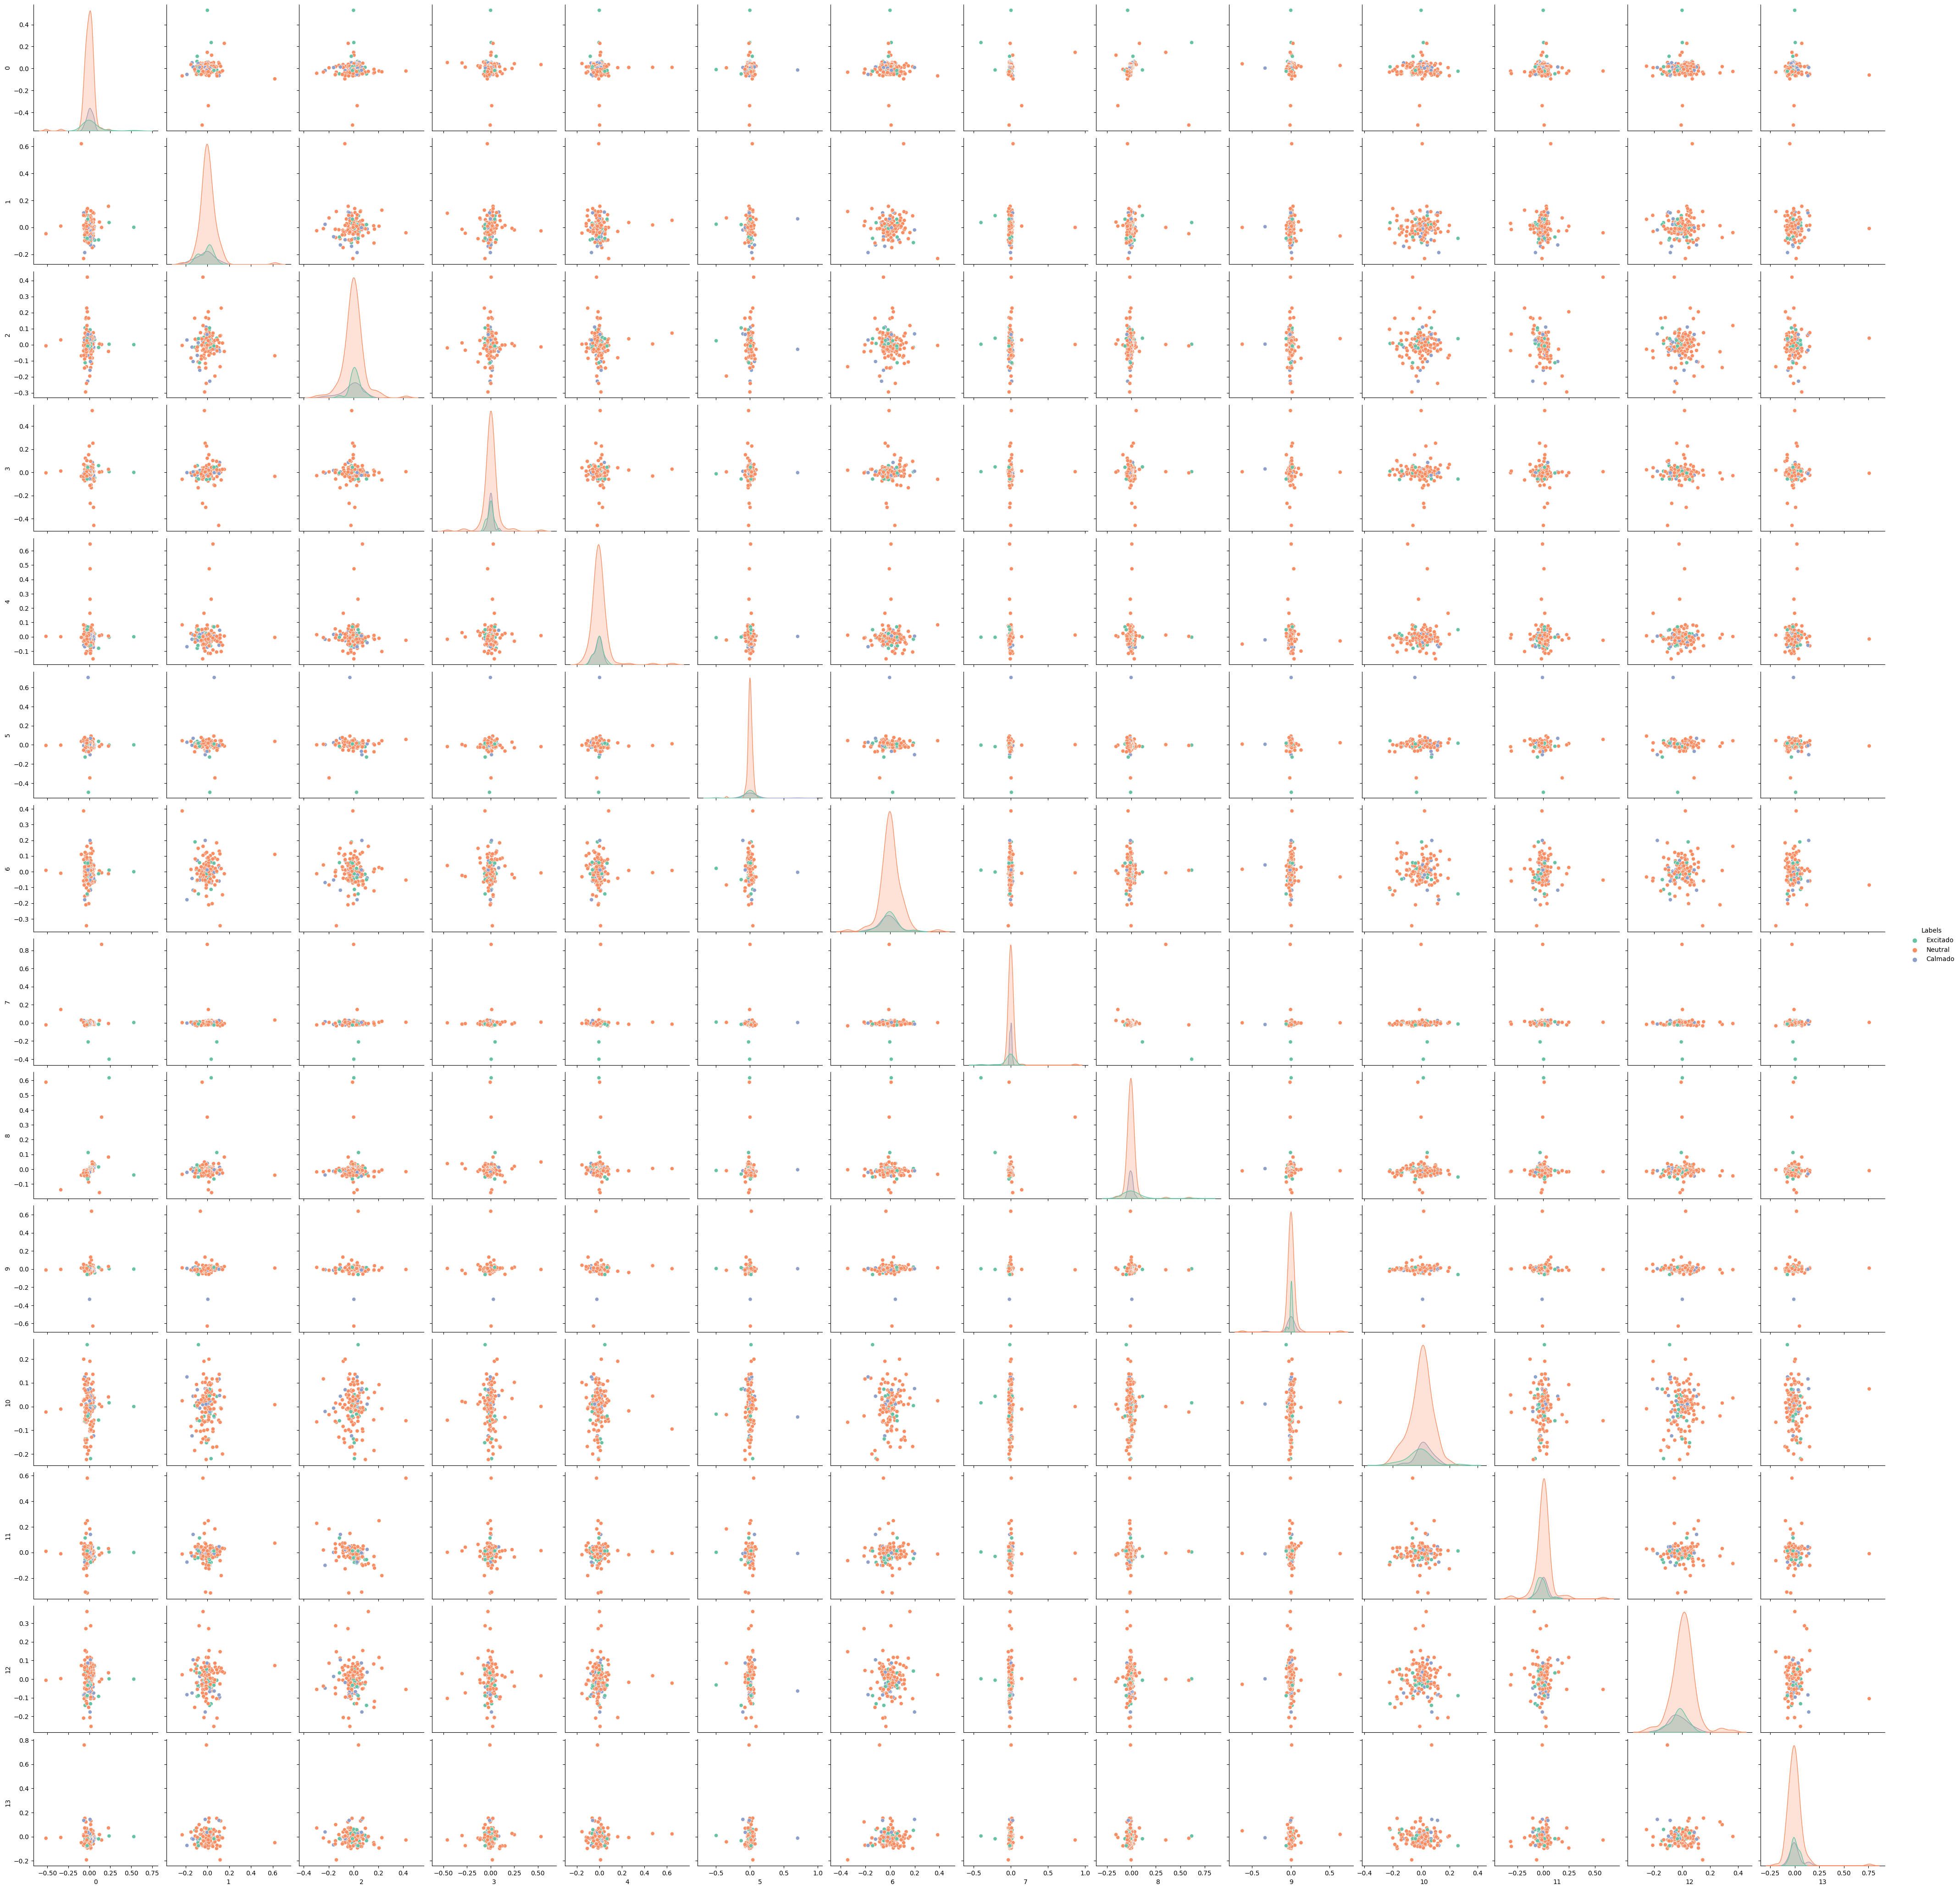

In [297]:
data_kpca = pd.DataFrame(data=X_kpca)
data_kpca['Labels'] = y
sns.pairplot(data_kpca, hue="Labels", height=3, palette = sns.color_palette("Set2",3))

In [298]:
data_kpca

0         1         2         3         4         5         6  \
0    0.530775  0.000000 -0.000000 -0.000000 -0.000000  0.000000 -0.000000   
1    0.236320  0.035483  0.002581  0.006054 -0.003006 -0.002925  0.009953   
2   -0.339640  0.008925  0.029724  0.011793  0.000387 -0.003149 -0.009857   
3    0.146999 -0.000978  0.001132  0.005774  0.012083  0.002253 -0.006775   
4   -0.013784  0.086794  0.040121  0.047508 -0.003626 -0.019029 -0.002044   
..        ...       ...       ...       ...       ...       ...       ...   
155 -0.027488 -0.039438  0.119154 -0.028091  0.001691  0.042492  0.161345   
156 -0.018327  0.060194 -0.008613  0.043968  0.069251  0.008472  0.054190   
157 -0.054901 -0.056266 -0.089507 -0.014548 -0.025021  0.076544  0.030886   
158 -0.025130 -0.082111  0.037258 -0.057987  0.049320  0.016973 -0.141434   
159 -0.028810  0.007693  0.025199 -0.031768 -0.016189  0.017551  0.090706   

            7         8         9        10        11        12        13  \
0    0.004021 -0.039388  0.000000 -0.000000 -0.000000 -0.000000 -0.000000   
1   -0.400379  0.618058  0.004247  0.015732  0.003960  0.001760  0.005422   
2    0.147257 -0.139502 -0.003142 -0.010642 -0.010320  0.002801 -0.006918   
3    0.865733  0.352132 -0.007182 -0.000069 -0.004802 -0.000381 -0.028056   
4   -0.209865  0.112436 -0.003860  0.043210 -0.030440 -0.005645 -0.017600   
..        ...       ...       ...       ...       ...       ...       ...   
155 -0.007306 -0.045783 -0.005867  0.035947 -0.086327  0.362015  0.001201   
156 -0.023793 -0.066374  0.019630 -0.040134  0.012617 -0.032712 -0.017417   
157 -0.027155 -0.044987 -0.021829  0.028309  0.044429  0.061580 -0.060058   
158 -0.012110 -0.053046 -0.059863  0.260399  0.011733 -0.088561 -0.075004   
159 -0.021084 -0.042630  0.007943 -0.140298 -0.013743 -0.130953 -0.026382   

       Labels  
0    Excitado  
1    Excitado  
2     Neutral  
3     Neutral  
4    Excitado  
..        ...  
155   Neutral  
156  Excitado  
157   Neutral  
158  Excitado  
159   Neutral  

[160 rows x 15 columns]

## **Reducción de dimensionalidad**

In [353]:
def graficar_pca_kpca(titulo, data_pca, y_codificado, data, n_components):
    colors = ['r', 'c', 'g']
    plt.figure(figsize=(15, 5))

    # Espacio latente 2 componentes
    plt.subplot(1, 2, 1)
    for i, emotion in enumerate(data['Labels'].unique()):
      subset = data_pca[y_codificado == i]
      plt.scatter(subset[0], subset[1], label=emotion, color=colors[i])

    plt.xlabel(titulo + ' Componente Principal 1')
    plt.ylabel(titulo + ' Componente Principal 2')
    plt.legend()
    plt.title(f'q={n_components} ' + titulo)

In [342]:
def aplicar_kpca(X_normalizado, n_components, k, gamma, degree):
    if k == 'poly':
        kpca = KernelPCA(n_components=int(n_components), kernel=k, degree=degree)
    elif k in ['linear', 'cosine']:
        kpca = KernelPCA(n_components=int(n_components), kernel=k)
    else:
        kpca = KernelPCA(n_components=int(n_components), kernel=k, gamma=gamma)

    X_kpca = kpca.fit_transform(X_normalizado)
    data_kpca = pd.DataFrame(data=X_kpca)
    print("KPCA - Original shape: ", X_normalizado.shape)
    print("KPCA - Transformed shape: ", X_kpca.shape)
    return data_kpca, kpca

In [354]:
def pca_kpca(PCA_flag, KPCA_flag, n_components, k,gamma,degree):
    perc = (n_components / 38) * 100
    print(f"Percent variables used: {np.round(perc, 3)}%")

    # PCA
    if PCA_flag:
        data_pca, pca = aplicar_pca(X_normalizado, n_components)
    else:
        data_pca = data

    # KPCA
    if KPCA_flag:
        data_kpca, kpca = aplicar_kpca(X_normalizado, n_components, k, gamma, degree)
    else:
        data_kpca = data_pca  # Usa el DataFrame PCA si KPCA_flag es False

    graficar_pca_kpca("PCA", data_pca, y_codificado, data, n_components)
    graficar_pca_kpca("KPCA", data_kpca, y_codificado, data, n_components)

    # Subconjunto de datos transformados por KPCA
    X_train_kpca, X_test_kpca, y_train_kpca, y_test_kpca = train_test_split(data_kpca, y_codificado, random_state=0, test_size=0.3)

    # Clasificador basado en Regresión Logística con KPCA
    clasificadorRL_kpca = modelo_regresion_logistica(X_train_kpca, y_train_kpca)
    y_pred_kpca = clasificadorRL_kpca.predict(X_test_kpca)

    # Evaluación del desempeño del clasificador con KPCA
    CMAT_kpca = confusion_matrix(y_test_kpca, y_pred_kpca)
    acc_kpca = accuracy_score(y_test_kpca, y_pred_kpca) * 100
    print(f'Regression Logstica con KPCA - Accuracy: {acc_kpca}%')

    # Matriz de Confusión con KPCA
    graficar_matriz_confusion(CMAT_kpca, y_codificado)

Utilizando PCA con 10 componentes y el kernel lineal para KPCA:

Percent variables used: 26.316%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 10)
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 10)
Regression Logstica con KPCA - Accuracy: 66.66666666666666%


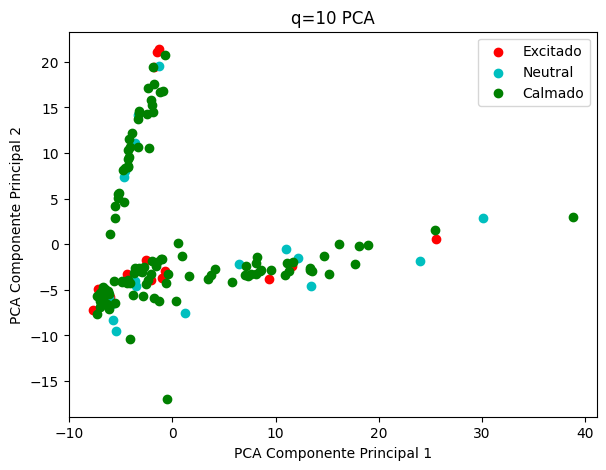

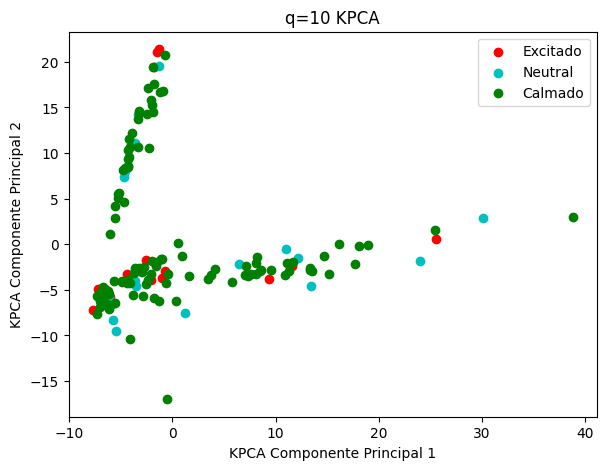

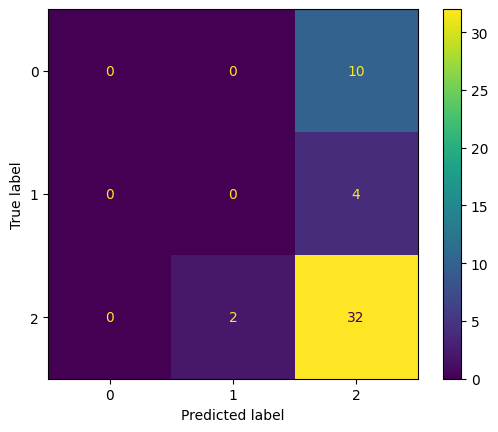

In [355]:
pca_kpca(PCA_flag=True, KPCA_flag=True, n_components=10, k='linear', gamma=0.01, degree=3)

Utilizando solo KPCA con el kernel polinomial, 5 componentes y un grado de 3:

Percent variables used: 13.158%
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 5)
Regression Logstica con KPCA - Accuracy: 66.66666666666666%


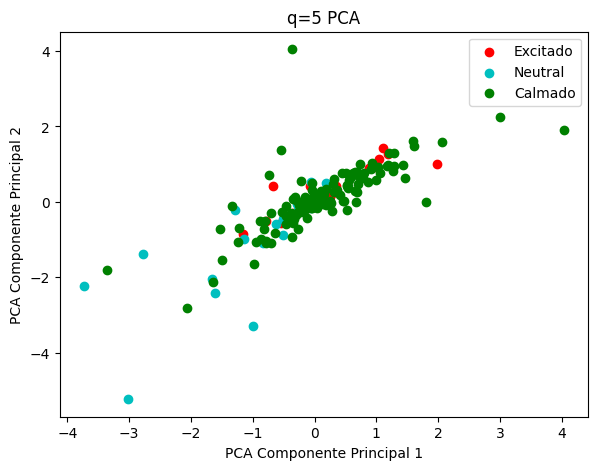

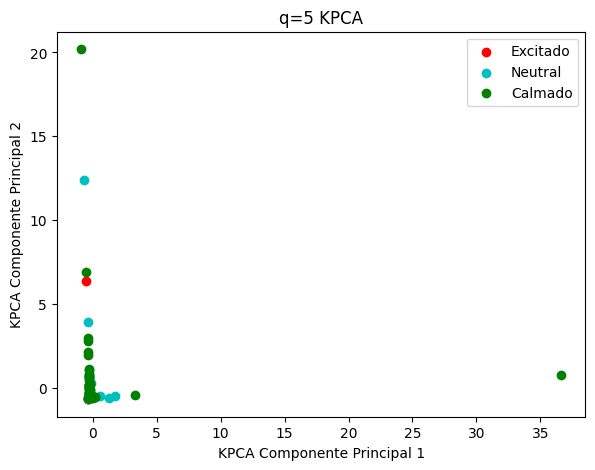

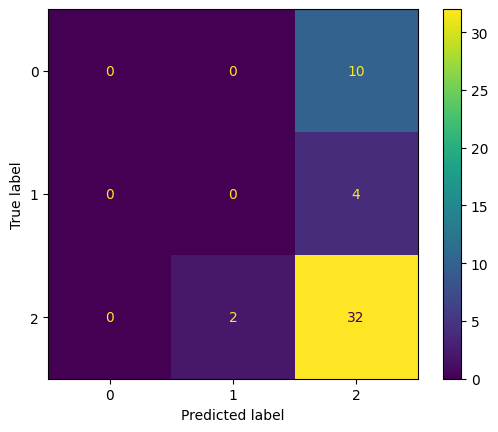

In [356]:
pca_kpca(PCA_flag=False, KPCA_flag=True, n_components=5, k='poly', gamma=1, degree=3)

Utilizando PCA sin KPCA, con 20 componentes:

Percent variables used: 52.632%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 20)
Regression Logstica con KPCA - Accuracy: 62.5%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


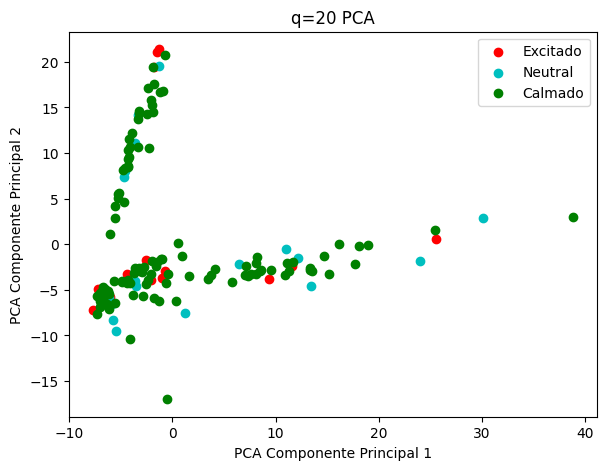

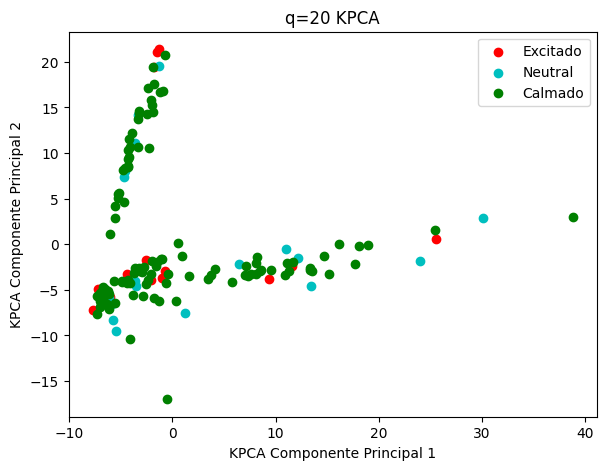

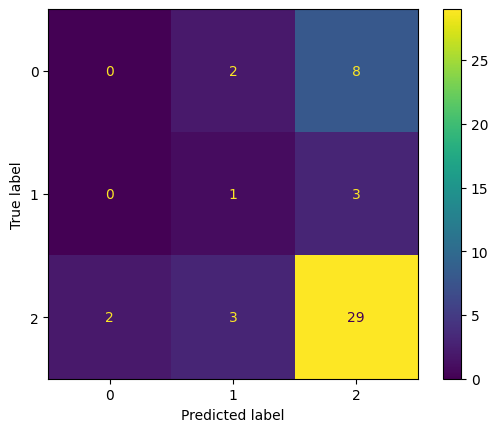

In [357]:
pca_kpca(PCA_flag=True, KPCA_flag=False, n_components=20, k='rbf', gamma=0.1, degree=1)

Utilizando KPCA con kernel RBF, 15 componentes y un gamma de 10:

Percent variables used: 39.474%
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 15)
Regression Logstica con KPCA - Accuracy: 70.83333333333334%


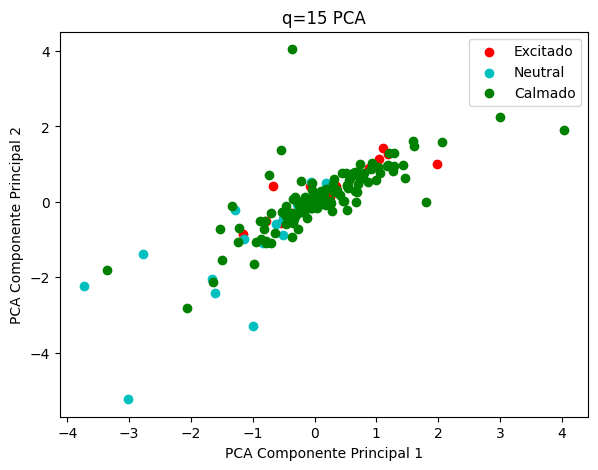

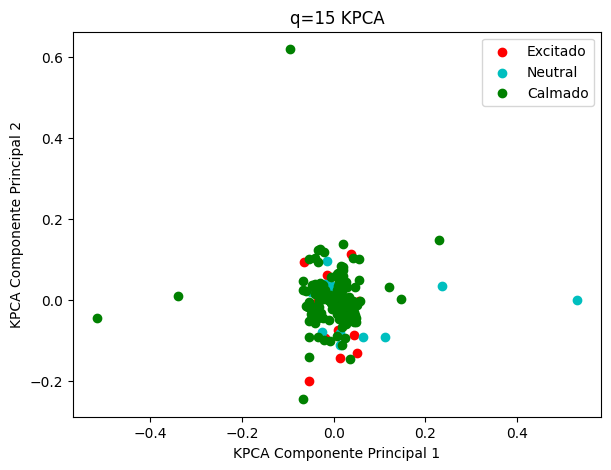

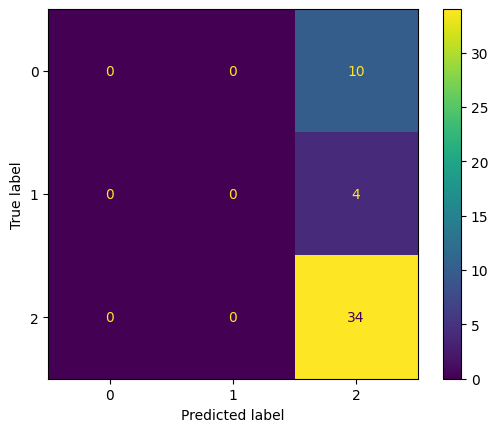

In [358]:
pca_kpca(PCA_flag=False, KPCA_flag=True, n_components=15, k='rbf', gamma=10, degree=1)

Utilizando PCA y KPCA con todos los componentes (38) y el kernel sigmoidal para KPCA:

Percent variables used: 100.0%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 38)
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 38)
Regression Logstica con KPCA - Accuracy: 70.83333333333334%


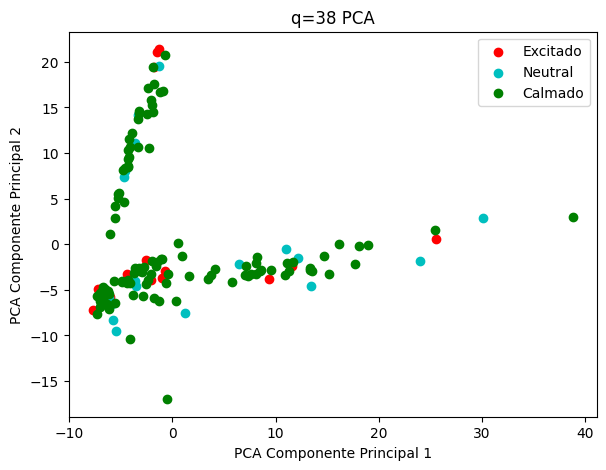

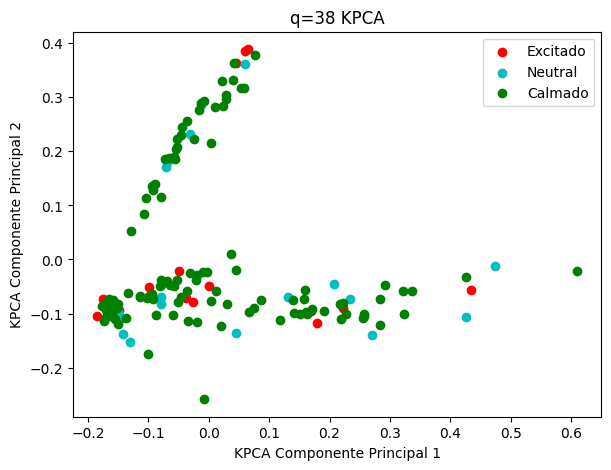

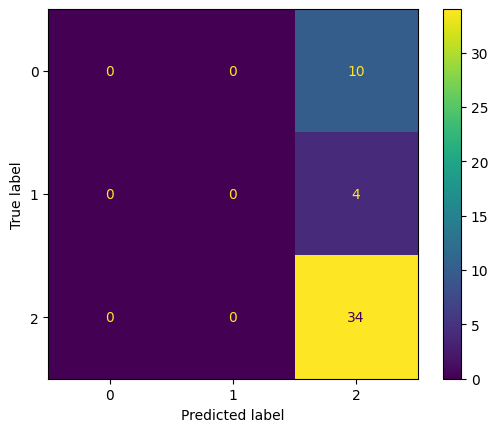

In [359]:
pca_kpca(PCA_flag=True, KPCA_flag=True, n_components=38, k='sigmoid', gamma=0.001, degree=1)

Utilizando PCA con 25 componentes y KPCA con kernel sigmoidal y gamma de 0.1:

Percent variables used: 65.789%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 25)
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 25)
Regression Logstica con KPCA - Accuracy: 70.83333333333334%


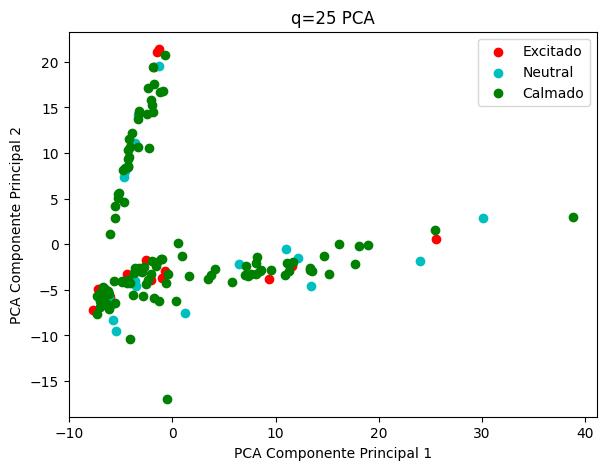

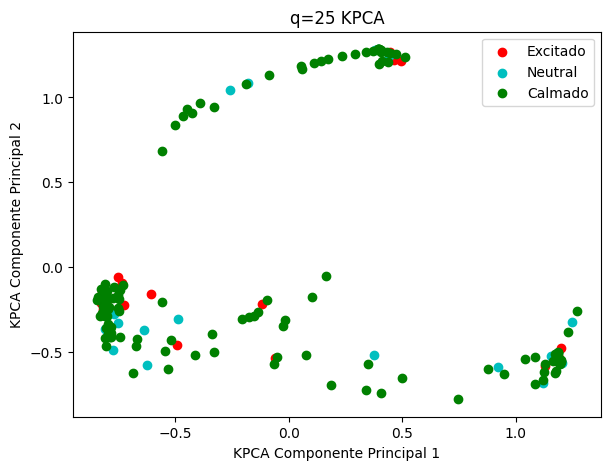

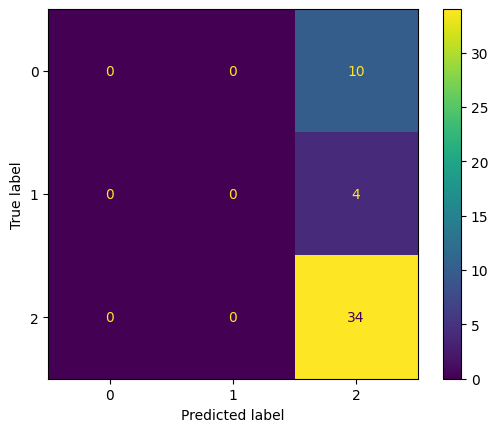

In [360]:
pca_kpca(PCA_flag=True, KPCA_flag=True, n_components=25, k='sigmoid', gamma=0.1, degree=1)

Solo PCA con 15 componentes:

Percent variables used: 39.474%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 15)
Regression Logstica con KPCA - Accuracy: 64.58333333333334%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


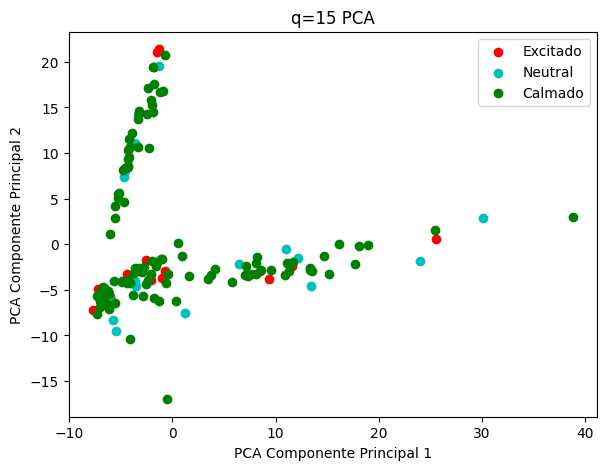

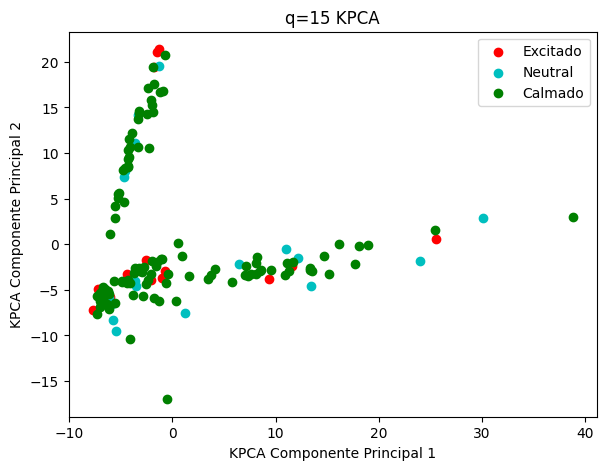

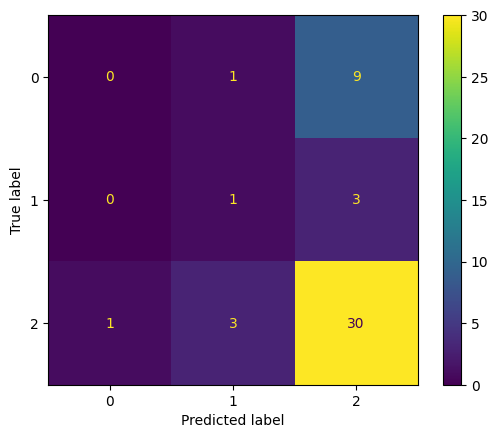

In [361]:
pca_kpca(PCA_flag=True, KPCA_flag=False, n_components=15, k='linear', gamma=1, degree=2)

PCA y KPCA con 30 componentes, kernel polinomial y degree de 5:

Percent variables used: 78.947%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 30)
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 30)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regression Logstica con KPCA - Accuracy: 75.0%


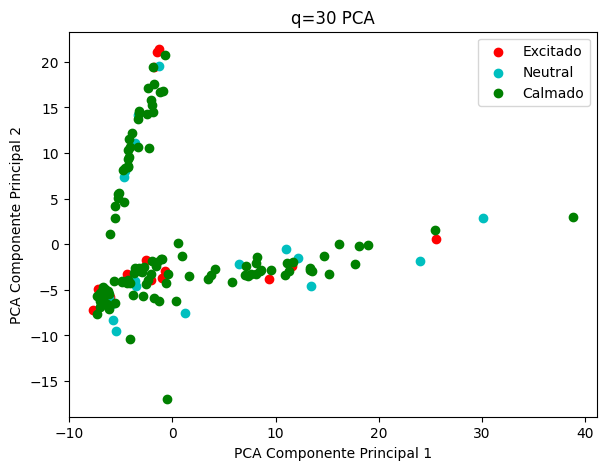

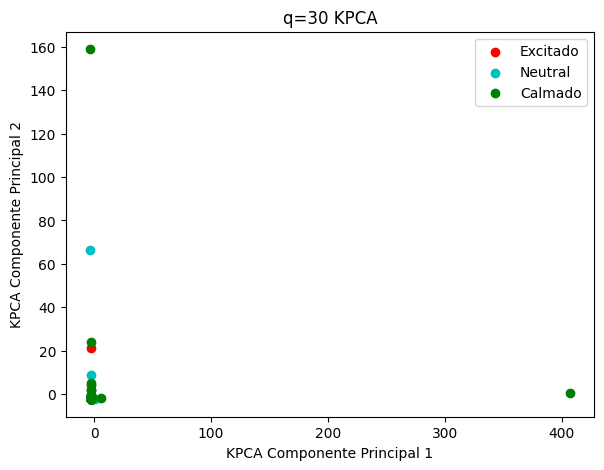

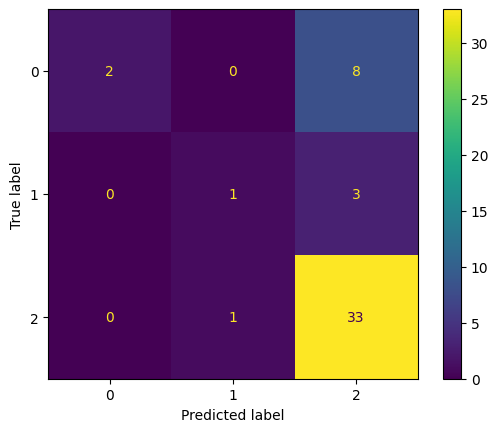

In [362]:
pca_kpca(PCA_flag=True, KPCA_flag=True, n_components=30, k='poly', gamma=0.01, degree=5)

KPCA con kernel lineal y 8 componentes, sin PCA:

Percent variables used: 21.053%
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 8)
Regression Logstica con KPCA - Accuracy: 68.75%


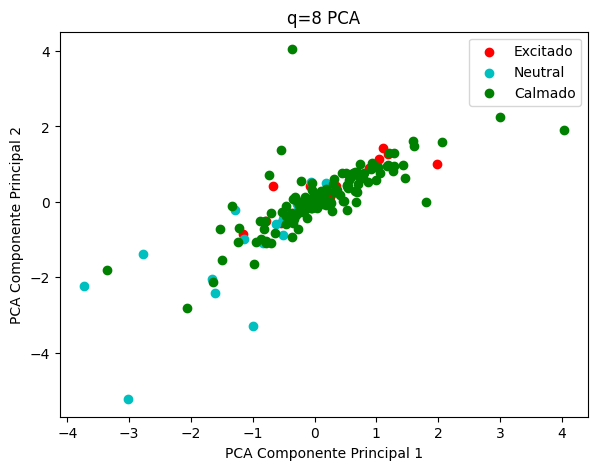

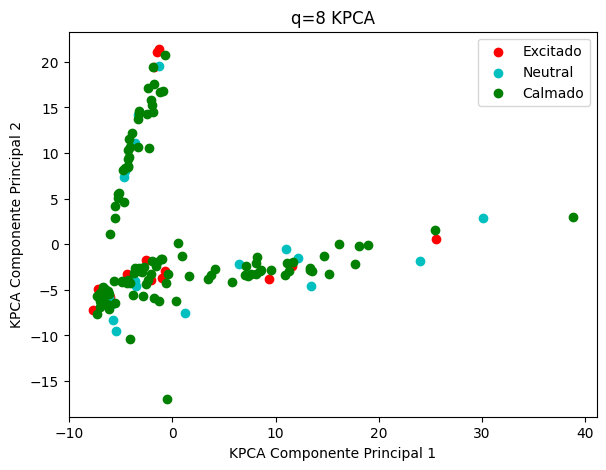

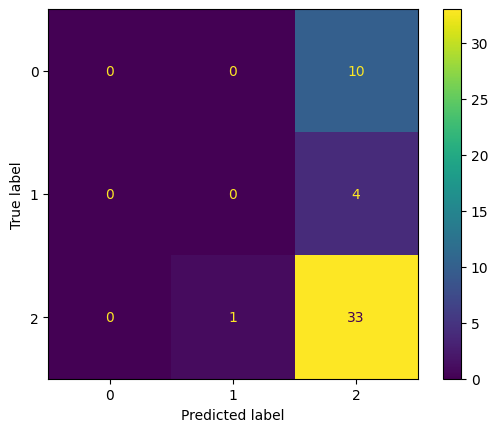

In [363]:
pca_kpca(PCA_flag=False, KPCA_flag=True, n_components=8, k='linear', gamma=1, degree=1)

PCA con 12 componentes y KPCA con kernel coseno y gamma de 0.001:

Percent variables used: 31.579%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 12)
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 12)
Regression Logstica con KPCA - Accuracy: 70.83333333333334%


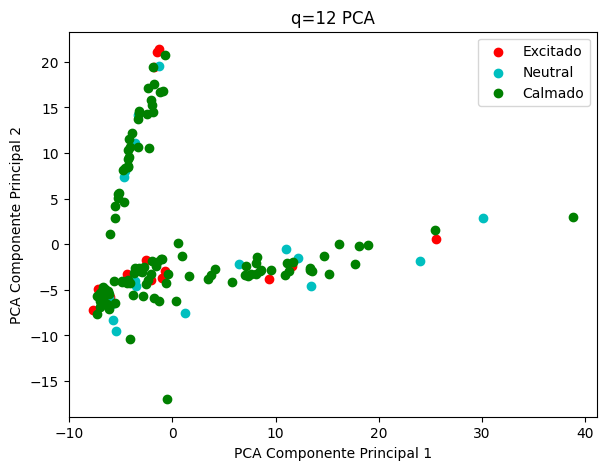

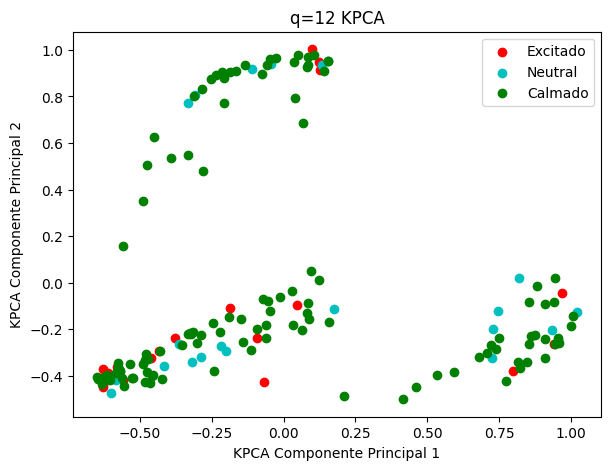

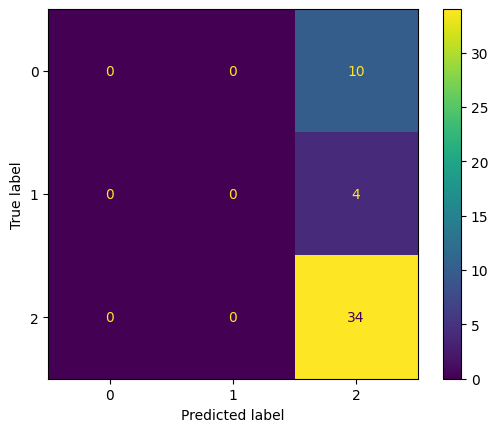

In [364]:
pca_kpca(PCA_flag=True, KPCA_flag=True, n_components=12, k='cosine', gamma=0.001, degree=1)

Solo KPCA con kernel polinomial, 18 componentes y degree de 7:

Percent variables used: 47.368%
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 18)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regression Logstica con KPCA - Accuracy: 66.66666666666666%


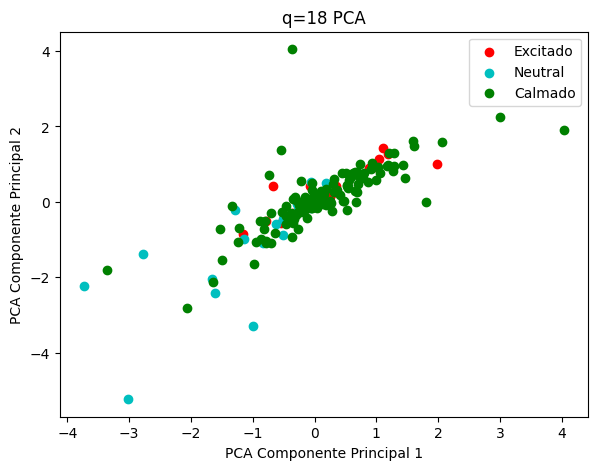

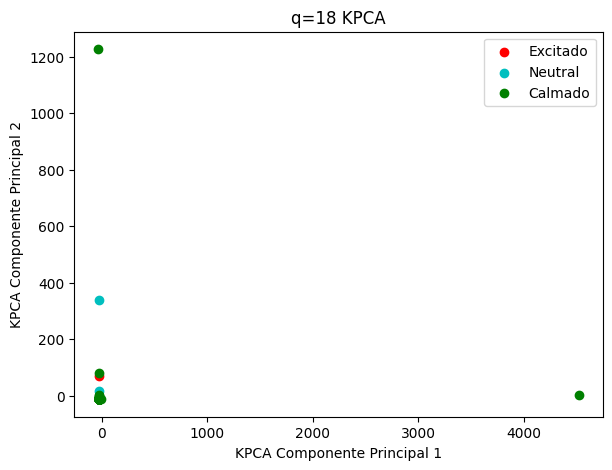

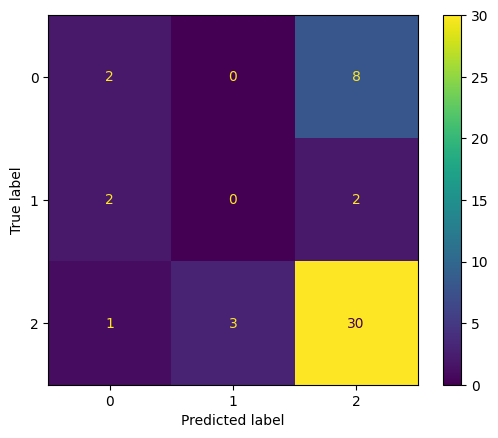

In [365]:
pca_kpca(PCA_flag=False, KPCA_flag=True, n_components=18, k='poly', gamma=5, degree=7)

PCA con 6 componentes y KPCA con kernel rbf y gamma de 10:

Percent variables used: 15.789%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 6)
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 3)
Regression Logstica con KPCA - Accuracy: 70.83333333333334%


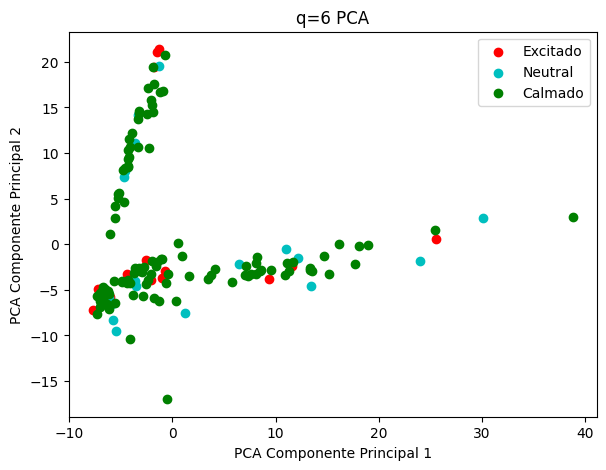

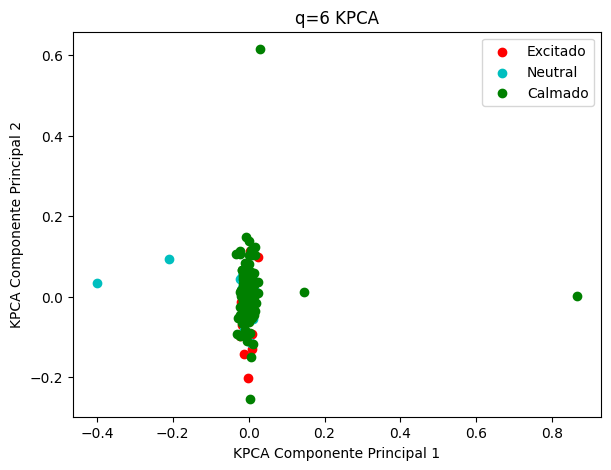

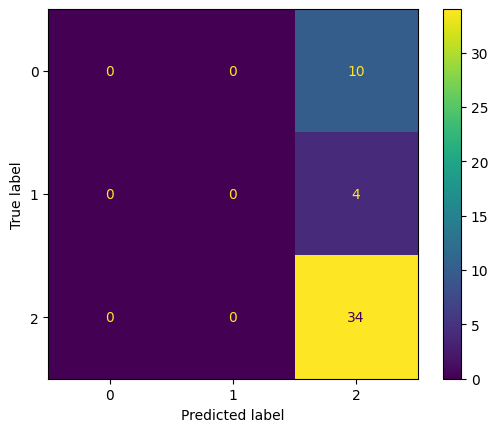

In [366]:
pca_kpca(PCA_flag=True, KPCA_flag=True, n_components=6, k='rbf', gamma=10, degree=1)

Solo PCA con 35 componentes:

Percent variables used: 92.105%
PCA - Original shape:  (160, 259)
PCA - Transformed shape:  (160, 35)
Regression Logstica con KPCA - Accuracy: 62.5%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


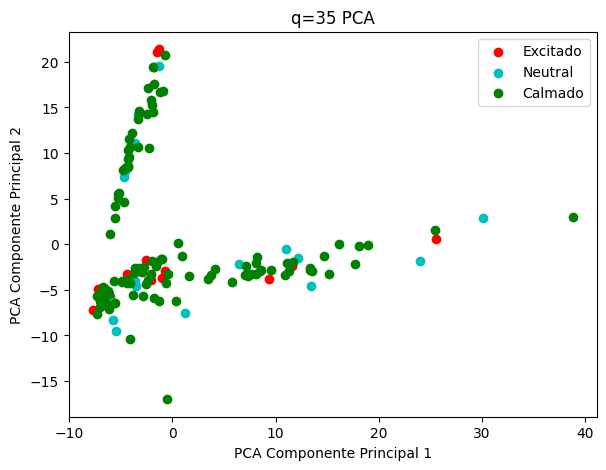

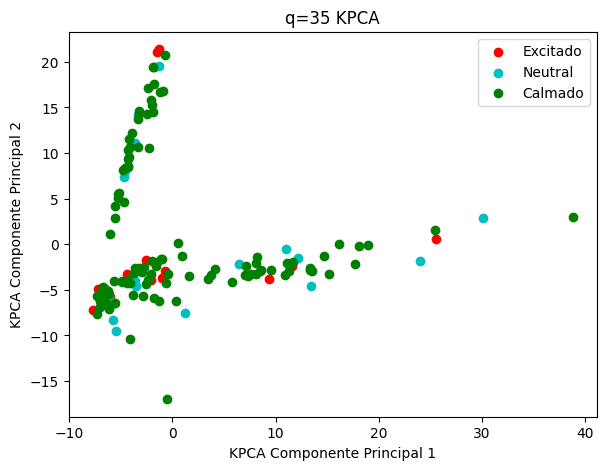

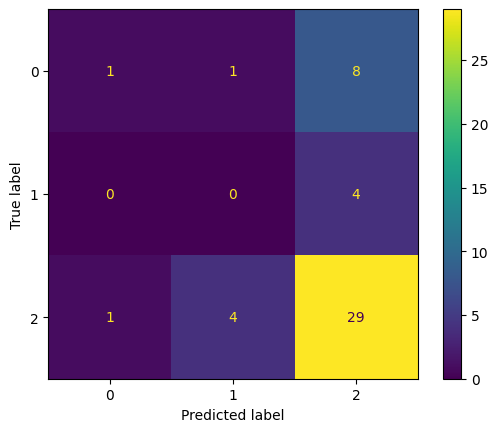

In [367]:
pca_kpca(PCA_flag=True, KPCA_flag=False, n_components=35, k='rbf', gamma=0.01, degree=1)

KPCA con kernel sigmoidal, 28 componentes y gamma de 100, sin PCA:

Percent variables used: 73.684%
KPCA - Original shape:  (160, 259)
KPCA - Transformed shape:  (160, 28)
Regression Logstica con KPCA - Accuracy: 68.75%


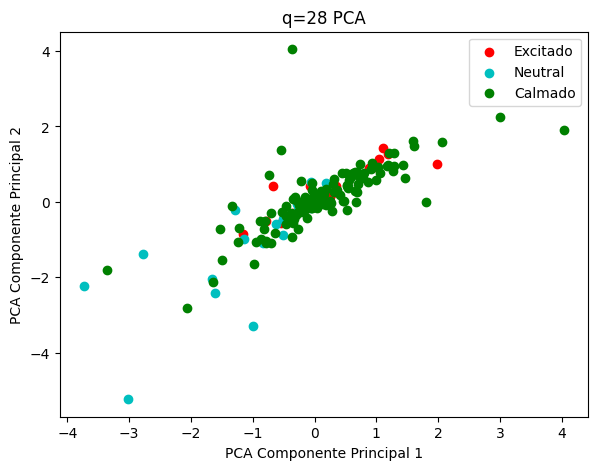

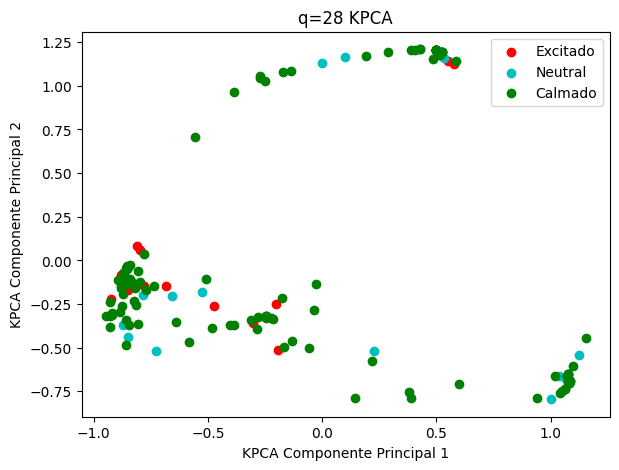

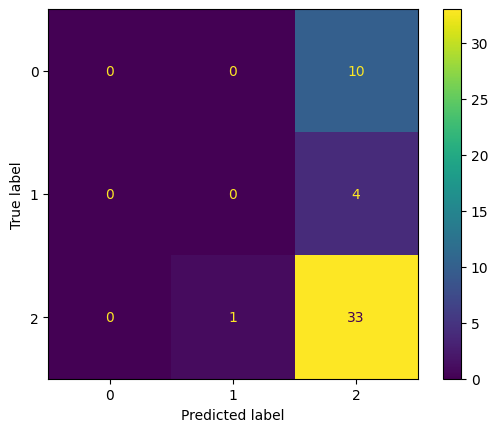

In [368]:
pca_kpca(PCA_flag=False, KPCA_flag=True, n_components=28, k='sigmoid', gamma=100, degree=1)

### **Referencias**

[1] DEAPdataset, "A dataset for emotion analysis using EEG, physiological, and video signals," consultado el 21 de septiembre de 2023. [En línea]. Disponible en: http://www.eecs.qmul.ac.uk/mmv/datasets/deap/index.html

[2] S. Koelstra, C. Muhl, M. Soleymani, J. Lee, A. Yazdani, T. Ebrahimi, T. Pun, A. Nijholt, and I. Patras, “Deap: A database for emotion analysis ;using physiological signals,” IEEE Transactions on Affective Computing, vol. 3,
no. 1, pp. 18–31, 2012.